In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path

matplotlib.rcParams["font.size"] = 15
matplotlib.rcParams["lines.linewidth"] = 3
matplotlib.rcParams["mathtext.default"] = 'regular'
matplotlib.rcParams['lines.markersize'] = 3

def ReadInFile(file, numChannel):
    
    data = []
    for c in range(numChannel):
        data.append([ [] for _ in range(3)])
    channels = [2*n for n in range(numChannel)]
    
    
    with open(file) as f:
        next(f)
        for line in f:
            lines = line.split('\n')[0].split(';')
            
            for c in range(numChannel):
                if int(lines[1]) == channels[c]:
                    data[c][0].append(float(lines[2]))
                    data[c][1].append(float(lines[3]))
                    data[c][2].append(lines[5])
    return data

def ReadInFileNaI(file, numChannel):
    
    data = []
    for c in range(numChannel):
        data.append([ [] for _ in range(3)])
    # channels = [2*n for n in range(numChannel)]
    channels = [0,2,6]
    
    
    with open(file) as f:
        next(f)
        for line in f:
            lines = line.split('\n')[0].split(';')
            
            for c in range(numChannel):
                if int(lines[1]) == channels[c]:
                    data[c][0].append(float(lines[2]))
                    data[c][1].append(float(lines[3]))
                    data[c][2].append(lines[5])
    return data
    
    
def BinHistograms(data, Range, numBins):
    binRange = np.linspace(Range[0],Range[1],numBins)
    hist,binedges = np.histogram(data,binRange)
    
    return hist, binedges
    
def TimeDifference(data):
    timeDiff0_2 =[]
    
    for i in range(len(data[0][0])):
        timeDiff0_2.append(data[0][0][i]-data[1][0][i])


        
    timeDiff0_2 = np.asfarray(timeDiff0_2,float)


        
    return timeDiff0_2

In [2]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/double_coinc_testing/2025_01_28/'
filename = 'SDataR_Large_LSC_vessel_Cs137_double_coinc_test_data.CSV'
bckfilename = 'SDataR_Large_LSC_vessel_Cs137_no_coinc_test_data.CSV'


data = ReadInFile(f'{filepath}/{filename}',2)
Bckdata = ReadInFile(f'{filepath}/{bckfilename}',2)

bins = 100
binRange = [0,1000]

binsLYSO = 100
binRangeLYSO = [0,2000]

# Dual Coincidence free write testing

- Testing of the FreeWrite function of the CoMPASS software
- Data was taken of the two PMTs on the LSC with and without the coincidence settings enabled. 


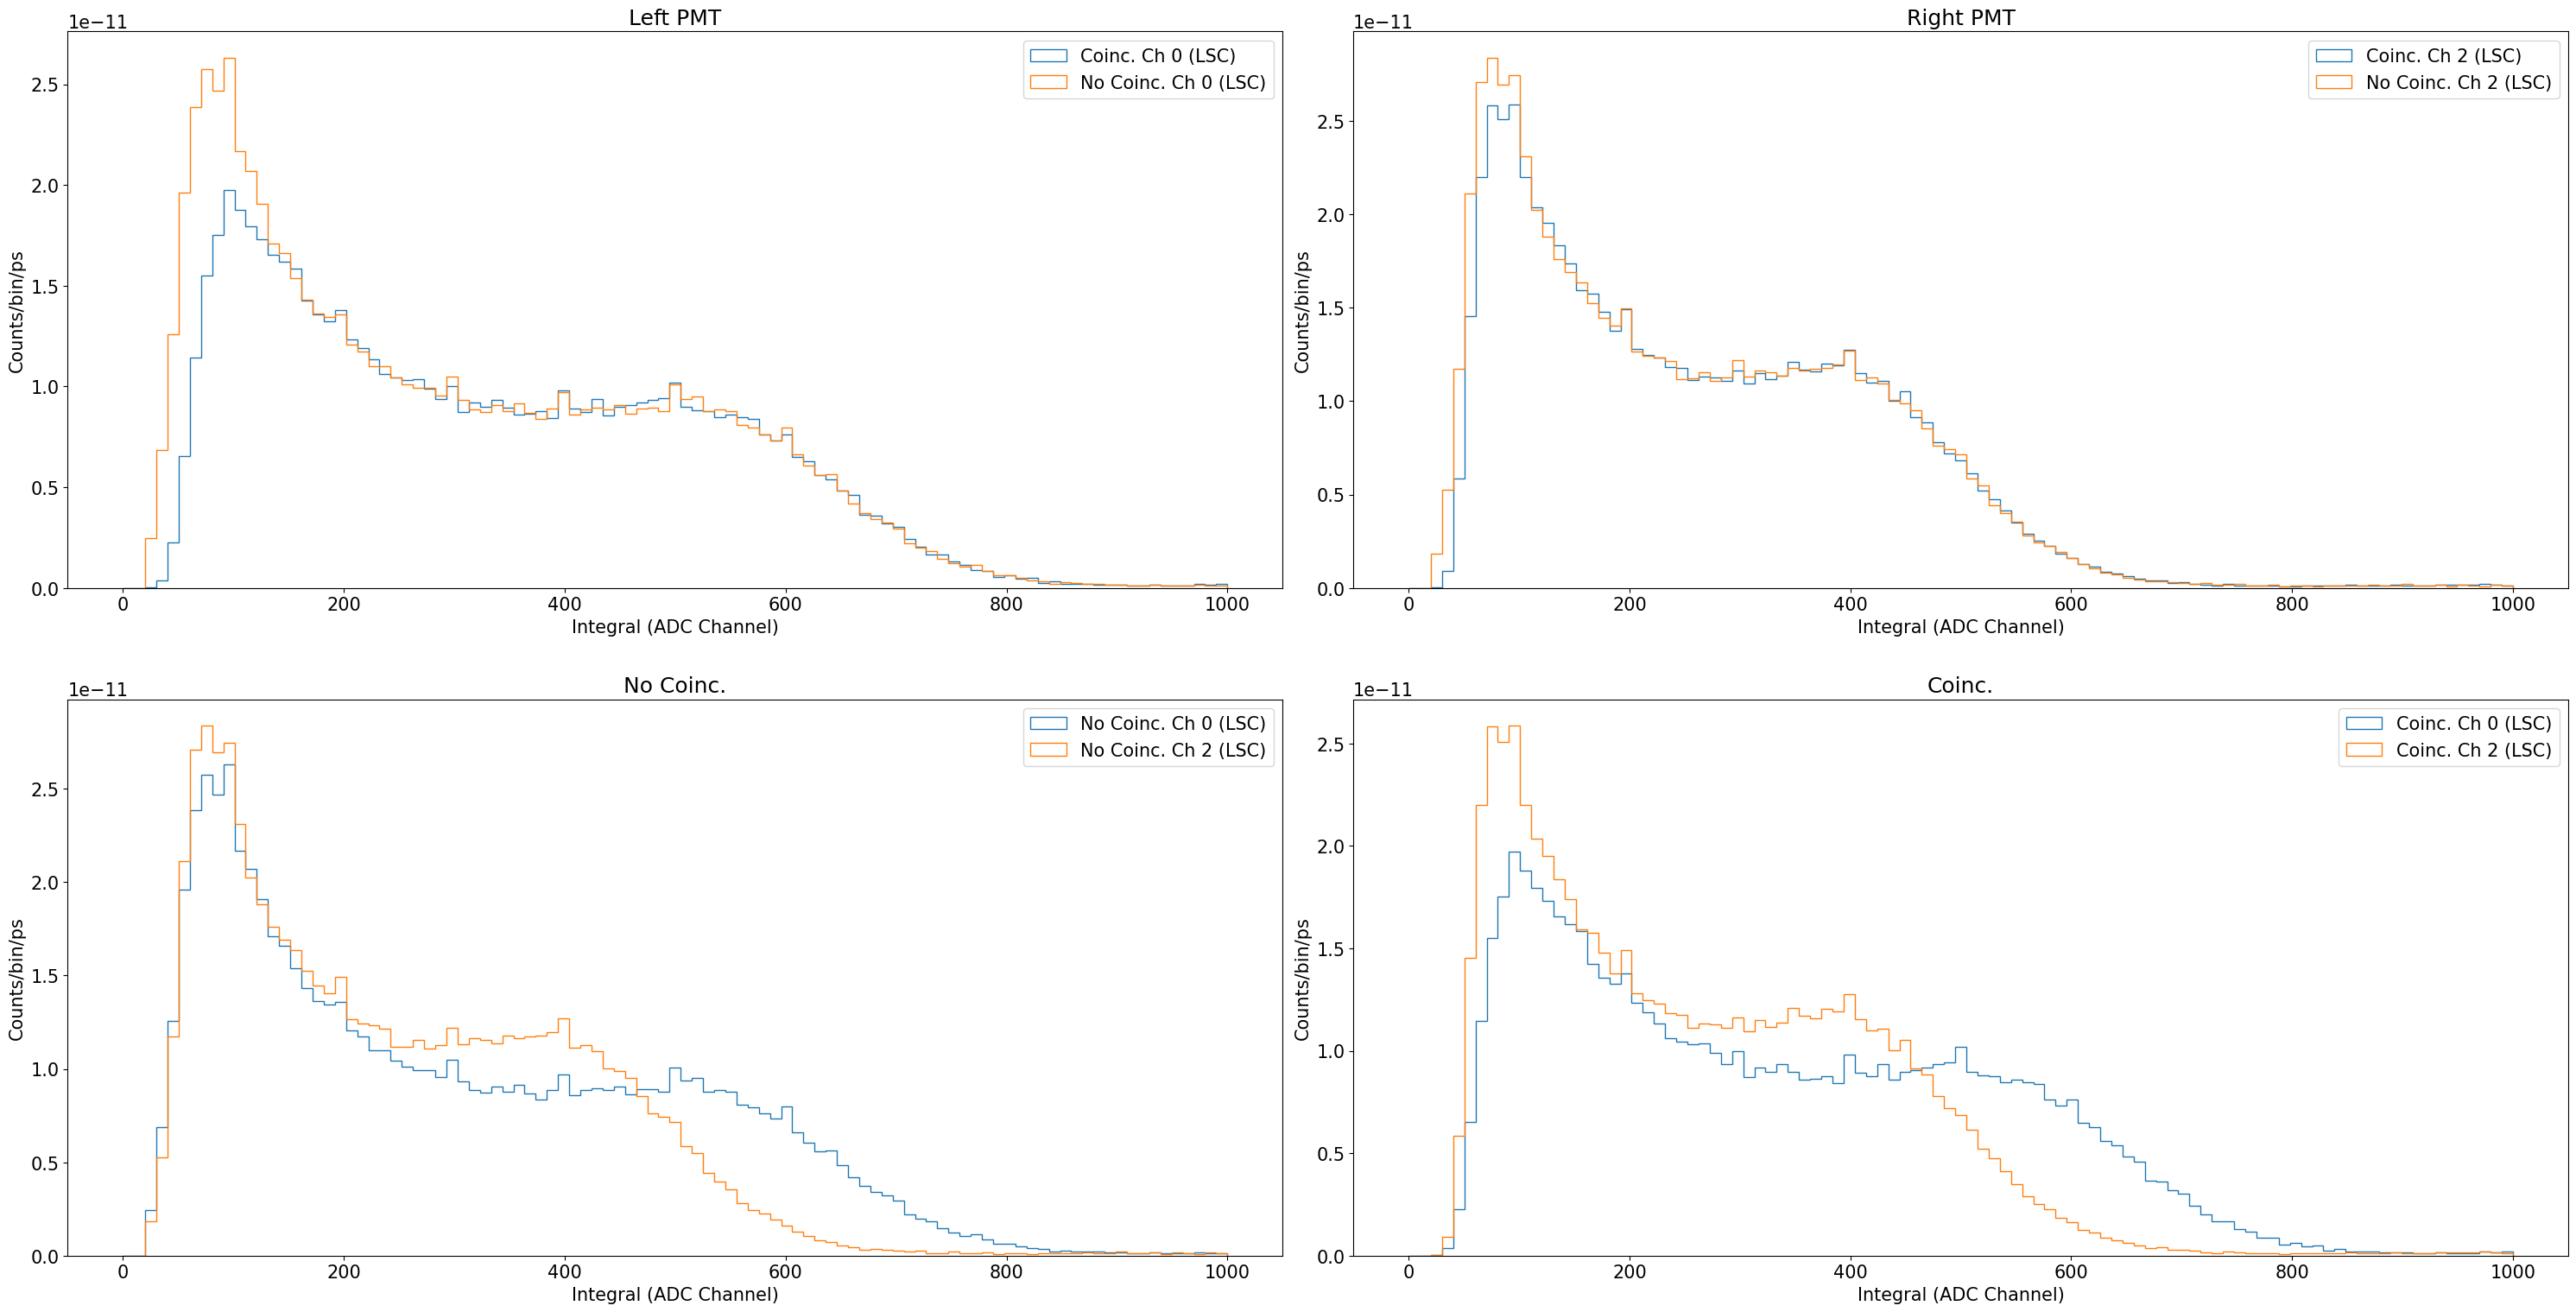

In [3]:
Int0, Bins0 = BinHistograms(data[0][1],binRange,bins)
Int2, Bins2 = BinHistograms(data[1][1],binRange,bins)


bckInt0, bckBins0 = BinHistograms(Bckdata[0][1],binRange,bins) #bck Data is the no coinc data
bckInt2, bckBins2 = BinHistograms(Bckdata[1][1],binRange,bins)


normalize = False
logScale = False

fig, ax = plt.subplots(2,2, figsize = (30,15))

plt.tight_layout()
plt.subplots_adjust(hspace = 0.2)

ax[0,0].hist(Bins0[:-1],bins =Bins0,density = normalize,weights=Int0/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Coinc. Ch 0 (LSC)', log = logScale)
ax[0,0].hist(bckBins0[:-1],bins =bckBins0,density = normalize,weights=bckInt0/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'No Coinc. Ch 0 (LSC)', log = logScale)

ax[0,1].hist(Bins2[:-1],bins =Bins2,density = normalize,weights=Int2/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Coinc. Ch 2 (LSC)', log = logScale)
ax[0,1].hist(bckBins2[:-1],bins =bckBins2,density = normalize,weights=bckInt2/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'No Coinc. Ch 2 (LSC)', log = logScale)

ax[1,0].hist(bckBins0[:-1],bins =bckBins0,density = normalize,weights=bckInt0/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'No Coinc. Ch 0 (LSC)', log = logScale)
ax[1,0].hist(bckBins2[:-1],bins =bckBins2,density = normalize,weights=bckInt2/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'No Coinc. Ch 2 (LSC)', log = logScale)

ax[1,1].hist(Bins0[:-1],bins =Bins0,density = normalize,weights=Int0/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Coinc. Ch 0 (LSC)', log = logScale)
ax[1,1].hist(Bins2[:-1],bins =Bins2,density = normalize,weights=Int2/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Coinc. Ch 2 (LSC)', log = logScale)




ax[0,0].set_title('Left PMT')
ax[0,1].set_title('Right PMT')
ax[1,0].set_title('No Coinc.')
ax[1,1].set_title('Coinc.')

ax[0,0].set_xlabel('Integral (ADC Channel)')
ax[0,1].set_xlabel('Integral (ADC Channel)')
ax[1,0].set_xlabel('Integral (ADC Channel)')
ax[1,1].set_xlabel('Integral (ADC Channel)')

ax[0,0].set_ylabel('Counts/bin/ps')
ax[0,1].set_ylabel('Counts/bin/ps')
ax[1,0].set_ylabel('Counts/bin/ps')
ax[1,1].set_ylabel('Counts/bin/ps')

ax[0,0].legend(loc = 'best')
ax[0,1].legend(loc = 'best')
ax[1,0].legend(loc = 'best')
ax[1,1].legend(loc = 'best')

# plt.savefig(f'{filepath}/figures/{filename.split('.csv')[0]}_1D_histogram.png', dpi = 400)
plt.show()


In [3]:
def BinHistograms(data, Range, numBins):
    binRange = np.linspace(Range[0],Range[1],numBins)
    hist,binedges = np.histogram(data,binRange)
    
    return hist, binedges


def TimeDifferenceChannel(data,channels):
    ######################################################################################################
    # Data: 2D array that contains the data of all the channels pre sorted using the RedInFile function. #
    # Channels: array of the two channels that you are taking the time difference of.                    #
    ######################################################################################################
    
    timeDiff = []
    for i in range(len(data[0][0])):
        timeDiff.append(data[channels[0]][0][i] - data[channels[1]][0][i])
        
    timeDiff = np.asfarray(timeDiff, float)
    return timeDiff

def energyHist1D(data, Bckdata, ChBins, BinRange, norm, log,saveFilePath,fileName):
    ######################################################################################################
    # Data: 2D array that contains the data of all the channels pre sorted using the RedInFile function. #
    # bckData: 2D array that contains the data of the background run.                                    #
    # ChBins: Array of the number of bins you want for each channel                                      #
    # BinRange: Range that the histogram will be binned over.                                            #
    ######################################################################################################
    # bins = 100
    # binRange = [0,1000]

    # binsLYSO = 100
    # binRangeLYSO = [0,2000]


    Int0, Bins0 = BinHistograms(data[0][1],BinRange[0],ChBins[0])
    Int2, Bins2 = BinHistograms(data[1][1],BinRange[1],ChBins[1])
    Int4, Bins4 = BinHistograms(data[2][1],BinRange[2],ChBins[2])

    bckInt0, bckBins0 = BinHistograms(Bckdata[0][1],BinRange[0],ChBins[0])
    bckInt2, bckBins2 = BinHistograms(Bckdata[1][1],BinRange[1],ChBins[1])
    bckInt4, bckBins4 = BinHistograms(Bckdata[2][1],BinRange[2],ChBins[2])
    
    normalize = norm
    logScale = log
    
    fig, ax = plt.subplots(1,3, figsize = (30,10))

    ax[0].hist(Bins0[:-1],bins =Bins0,density = normalize,weights=Int0/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Ch 0 (LSC)', log = logScale)
    ax[0].hist(bckBins0[:-1],bins =bckBins0,density = normalize,weights=bckInt0/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'Background Ch 0 (LSC)', log = logScale)

    ax[1].hist(Bins2[:-1],bins =Bins2,density = normalize,weights=Int2/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Ch 2 (LSC)', log = logScale)
    ax[1].hist(bckBins2[:-1],bins =bckBins2,density = normalize,weights=bckInt2/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'Background Ch 0 (LSC)', log = logScale)

    ax[2].hist(Bins4[:-1],bins =Bins4,density = normalize,weights=Int4/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Ch 4 (LYSO)', log = logScale)
    ax[2].hist(bckBins4[:-1],bins =bckBins4,density = normalize,weights=bckInt4/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'Background Ch 0 (LSC)', log = logScale)

    ax[0].set_title('Left PMT')
    ax[1].set_title('Right PMT')
    ax[2].set_title('LYSO')

    ax[0].set_xlabel('Integral (ADC Channel)')
    ax[1].set_xlabel('Integral (ADC Channel)')
    ax[2].set_xlabel('Integral (ADC Channel)')

    ax[0].set_ylabel('Counts/bin/ps')
    ax[1].set_ylabel('Counts/bin/ps')
    ax[2].set_ylabel('Counts/bin/ps')
    
    ax[0].legend(loc = 'best')
    ax[1].legend(loc = 'best')
    ax[2].legend(loc = 'best')
    
    
    # plt.show()
    plt.savefig(f'{saveFilePath}/{fileName}_integral_1D_hist.png')
    plt.close()
    
def TimeDiff1D(data, BinRange,saveFilePath,fileName):
    ######################################################################################################
    # Data: 2D array that contains the data of all the channels pre sorted using the RedInFile function. #
    # bckData: 2D array that contains the data of the background run.                                    #
    # timeBins: Array of the number of bins you want for each channel and time bin                       #
    # BinRange: Range that the histogram will be binned over.  
    ######################################################################################################   
    
    
    
    timeBins = (BinRange[1] - BinRange[0])//2000

    timebinsRange = np.linspace(BinRange[0],BinRange[1],timeBins)/1000


    fig,ax = plt.subplots(3,3,figsize = (30,30))
    
    for i in range(3):
        for j in range(3):

            ax[i,j].hist(TimeDifferenceChannel(data,[i,j])/1000, bins = timebinsRange)
            ax[i,j].set_title(f'Time Difference Ch{2*i} - Ch{2*j}')

            
    ax[0,0].set_xlabel('Time Difference (ns)')
    ax[0,1].set_xlabel('Time Difference (ns)')
    ax[0,2].set_xlabel('Time Difference (ns)')
    ax[1,0].set_xlabel('Time Difference (ns)')
    ax[1,1].set_xlabel('Time Difference (ns)')
    ax[1,2].set_xlabel('Time Difference (ns)')
    ax[2,0].set_xlabel('Time Difference (ns)')
    ax[2,1].set_xlabel('Time Difference (ns)')
    ax[2,2].set_xlabel('Time Difference (ns)')
    
    ax[0,0].set_ylabel('Counts')
    ax[0,1].set_ylabel('Counts')
    ax[0,2].set_ylabel('Counts')
    ax[1,0].set_ylabel('Counts')
    ax[1,1].set_ylabel('Counts')
    ax[1,2].set_ylabel('Counts')
    ax[2,0].set_ylabel('Counts')
    ax[2,1].set_ylabel('Counts')
    ax[2,2].set_ylabel('Counts')
    


    # plt.show()
    plt.savefig(f'{saveFilePath}/{fileName}_time_diff_1D_hist.png')
    plt.close()
    
def energyHist2D(data,ChBins,BinRange,saveFilePath,fileName):
    
    ChBinsArray = []
    for i in range(3):
        ChBinsArray.append(np.linspace(BinRange[i][0],BinRange[i][1],ChBins[i]))
    
    
    
    fig,ax = plt.subplots(3,3,figsize = (30,30))    
    
    for i in range(3):
        for j in range(3):

            ax[i,j].hist2d(data[i][1],data[j][1],bins = (ChBinsArray[i],ChBinsArray[j]),cmin = 1)#,norm=matplotlib.colors.LogNorm())
            ax[i,j].set_title(f'Ch{2*i}, Ch{2*j} 2D hist')
            ax[i,j].set_xlabel(f'Ch{2*i} Integral')
            ax[i,j].set_ylabel(f'Ch{2*j} Integral')

    # plt.show()
    plt.savefig(f'{saveFilePath}/{fileName}_integral_2D_hist.png')
    plt.close()
    
def TimDiff2D(data,ChBins,ChBinRange,TimeBinRange,saveFilePath,fileName):
    
    ChBinsArray = []
    for i in range(3):
        ChBinsArray.append(np.linspace(ChBinRange[i][0],ChBinRange[i][1],ChBins[i]))
        
    timeBins = (TimeBinRange[1] - TimeBinRange[0])//2000
    timebinsRange = np.linspace(TimeBinRange[0],TimeBinRange[1],timeBins)/1000
    
    
    fig,ax=plt.subplots(3,3,figsize = (30,30))
    
    for i in range(3):
        for j in range(3):

            ax[i,j].hist2d(data[i][1],TimeDifferenceChannel(data,[i,j])/1000, bins =(ChBinsArray[i],timebinsRange), cmin = 1)
            ax[i,j].set_title(f'Ch{2*i} Integral, Ch{2*i} - Ch{2*j} Time Difference')
            ax[i,j].set_xlabel(f'Ch{2*i} integral')
            ax[i,j].set_ylabel(f'Ch{2*i} - Ch{2*j} Time Difference')

            
    # plt.show()
    plt.savefig(f'{saveFilePath}/{fileName}_integral_time_diff_2D_hist.png')
    plt.close()
    
def TimeCut(data):
    timeDiff = TimeDifferenceChannel(data,[4,0])
    
    CoincData = [[],[],[]]
    cutData = [[],[],[]]
    for i in range(len(data)):
        if timeDiff > 50 and timeDiff < 100:
            CoincData[0].append(data[0][i])
            CoincData[1].append(data[1][i])
            CoincData[2].append(data[2][i])
        else:
            cutData[0].append(data[0][i])
            cutData[1].append(data[1][i])    
            cutData[2].append(data[2][i])    
    return CoincData, cutData
                
        
    


# Cobalt-60 testing

- Variety of trials were performed using Co-60 as the source. 
- These were performed to determine if the energy of the Cs was too low and being obscured by the radioactivity from the LYSO. 

# First Test: Large_LSC_Vessel_LYSO_Co60
- Triple Coinc. between all three detectors
# Second Test: Large_LSC_Vessel_LYSO_bck
- Background with the LYSO in place, and no source.
# Third Test: Large_LSC_Vessel_LYSO_Co60_left_PMT_coinc
- Coincidence only between the left LSC PMT and the LYSO detector
# Fourth Test: Large_LSC_Vessel_LYSO_Co60_Right_PMT_coinc
- Coincidence only between the right LSC PMT and the LYSO detector

### <ins>All of the data is plotted with the background data to compare against background.</ins> 

Settings for the first 4 tests: 


| Setting                | Left PMT    | Right PMT   | LYSO        |
| --------               | -------     | -------     |-------      |
| **Pretrigger**         | 128ns       | 128ns       | 128ns       |
| **Polarity**           | Negative    | Negative    | Negative    |
| **N Samples Baseline** | 256 Samples | 256 Samples | 256 Samples |
| **Input Range**        | 0.5 vpp     | 0.5 vpp     | 2.0 vpp     |
| **Discriminator Mode** | LED         | LED         | CFD         |
| **Threshold**          | 1000 lsb    | 1000lsb     | 100lsb      |
| **Trigger HoldOff**    | 1024 ns     | 1024 ns     | 1024 ns     |
| **CFD Delay**          | N/A         | N/A         | 6ns         |
| **CFD Fraction**       | N/A         | N/A         | 75%         |
| **Smoothing**          | Disabled    | Disabled    | Disabled    |
| **Energy Coarse gain** | 40 fc       | 40fc        | 40fc        |
| **Gate**               | 300 ns      | 300 ns      | 400 ns      |
| **Pre-gate**           | 50 ns       | 50 ns       | 74 ns       |



In [5]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Co60_testing/2025_01_29/'

bckFile = 'SDataR_Large_LSC_vessel_LYSO_bck.CSV'
file1 = 'SDataR_Large_LSC_vessel_LYSO_Co60.CSV'
file2 = 'SDataR_Large_LSC_vessel_LYSO_Co60_left_PMT_coinc.CSV'
file3 = 'SDataR_Large_LSC_vessel_LYSO_Co60_right_PMT_coinc.CSV'

bckData = ReadInFile(f'{filepath}/{bckFile}', 3)
file1Data = ReadInFile(f'{filepath}/{file1}', 3)
file2Data = ReadInFile(f'{filepath}/{file2}', 3)
file3Data = ReadInFile(f'{filepath}/{file3}', 3)




In [91]:
#################################################################################################
#   File 1 Plots
#################################################################################################

fileName = file1.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = file1Data, Bckdata = bckData, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(file1Data, BinRange = [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(file1Data, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = file1Data,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)


In [94]:
#################################################################################################
#   File 2 Plots
#################################################################################################

dataFile = file2Data
fileName = file2.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = bckData, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(dataFile, BinRange = [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)


In [95]:
#################################################################################################
#   File 3 Plots
#################################################################################################

# These plots are being plotted correctly. This file isn't that important so leave it for now and come back later.  


dataFile = file3Data
fileName = file3.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = bckData, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)

# Cobalt-60 testing

- Variety of trials were performed using Co-60 as the source. 
- These were performed to determine if the energy of the Cs was too low and being obscured by the radioactivity from the LYSO. 

# First Test: Large_LSC_Vessel_LYSO_Co60_no_coinc_leading_edge
- Triple Coinc. between all three detectors
# Second Test: Large_LSC_Vessel_LYSO_C060_triple_coinc_leading_edge
- Background with the LYSO in place, and no source.


### <ins>All of the data is plotted with the background data to compare against background.</ins> 

Settings for the first 4 tests: 


| Setting                | Left PMT    | Right PMT   | LYSO        |
| --------               | -------     | -------     |-------      |
| **Pretrigger**         | 128ns       | 128ns       | 128ns       |
| **Polarity**           | Negative    | Negative    | Negative    |
| **N Samples Baseline** | 256 Samples | 256 Samples | 256 Samples |
| **Input Range**        | 0.5 vpp     | 0.5 vpp     | 2.0 vpp     |
| **Discriminator Mode** | LED         | LED         | LED         |
| **Threshold**          | 1000 lsb    | 1000lsb     | 300lsb      |
| **Trigger HoldOff**    | 1024 ns     | 1024 ns     | 1024 ns     |
| **CFD Delay**          | N/A         | N/A         | N/A         |
| **CFD Fraction**       | N/A         | N/A         | N/A         |
| **Smoothing**          | Disabled    | Disabled    | Disabled    |
| **Energy Coarse gain** | 40 fc       | 40fc        | 40fc        |
| **Gate**               | 300 ns      | 300 ns      | 400 ns      |
| **Pre-gate**           | 50 ns       | 50 ns       | 74 ns       |



In [15]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Co60_testing/2025_01_29/'


file4 = 'SDataR_Large_LSC_vessel_LYSO_Co60_no_coinc_leading_edge.CSV'
file5 = 'SDataR_Large_LSC_vessel_LYSO_Co60_Triple_coinc_leading_edge.CSV'

file4Data = ReadInFile(f'{filepath}/{file4}', 3)
file5Data = ReadInFile(f'{filepath}/{file5}', 3)





In [16]:
#################################################################################################
#   File 4 Plots
#################################################################################################

# These plots are being plotted correctly. This file isn't that important so leave it for now and come back later.  


dataFile = file4Data
fileName = file4.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = bckData, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
# No Coinc means that the number of events in each channel isn't necessarily the same. 
# TimeDiff1D(data = dataFile, BinRange = [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)
# energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
# TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)

In [19]:
#################################################################################################
#   File 5 Plots
#################################################################################################




dataFile = file5Data
fileName = file5.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = bckData, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,1000],[0,1000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-75000,75000],saveFilePath = saveFilePath,fileName = fileName)

# Cobalt-60 testing

- Variety of trials were performed using Co-60 as the source. 
- These were performed to determine if the energy of the Cs was too low and being obscured by the radioactivity from the LYSO. 

# First Test: Large_LSC_Vessel_NaI_Co60_triple_coinc
- Triple Coinc. between all three detectors



### <ins>All of the data is plotted with the background data to compare against background.</ins> 

Settings for the first 4 tests: 


| Setting                | Left PMT    | Right PMT   | NaI         |
| --------               | -------     | -------     |-------      |
| **Pretrigger**         | 128ns       | 128ns       | 400ns       |
| **Polarity**           | Negative    | Negative    | posative    |
| **N Samples Baseline** | 256 Samples | 256 Samples | 64 Samples  |
| **Input Range**        | 0.5 vpp     | 0.5 vpp     | 2.0 vpp     |
| **Discriminator Mode** | LED         | LED         | CFD         |
| **Threshold**          | 1000 lsb    | 1000lsb     | 300lsb      |
| **Trigger HoldOff**    | 1024 ns     | 1024 ns     | 1024 ns     |
| **CFD Delay**          | N/A         | N/A         | 200 ns      |
| **CFD Fraction**       | N/A         | N/A         | 75%         |
| **Smoothing**          | Disabled    | Disabled    | Disabled    |
| **Energy Coarse gain** | 40 fc       | 40fc        | 40fc        |
| **Gate**               | 300 ns      | 300 ns      | 700 ns      |
| **Pre-gate**           | 50 ns       | 50 ns       | 350 ns      |



In [ ]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Co60_testing/2025_01_29/'


file6 = 'SDataR_Large_LSC_vessel_NaI_Co60_Triple_coinc.CSV'

file6Data = ReadInFileNaI(f'{filepath}/{file6}', 3)




17825
17825
17825


In [44]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file6Data
fileName = file6.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = dataFile, ChBins = [100,100,100], BinRange = [[0,2000],[0,2000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,2000],[0,2000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)

# Vertical Geometry Testing

- A new Lead geometry was tested to determine if that could make the Cs-137 line more resolvable. 
- 4 lead bricks were placed in a flat layer on the table with a small slit for the Cs-137. The LSC vessel was placed on top of the lead directly above the Cs-137. The LYSO was placed at a 90 degree angle with respect to the LSC. 

# First Test: Large_LSC_Vessel_LYSO_Cs137_triple_coinc_new_lead_placment
-

Settings for this trial 


| Setting                | Left PMT    | Right PMT   | LYSO        |
| --------               | -------     | -------     |-------      |
| **Pretrigger**         | 128ns       | 128ns       | 128ns       |
| **Polarity**           | Negative    | Negative    | Negative    |
| **N Samples Baseline** | 256 Samples | 256 Samples | 256 Samples |
| **Input Range**        | 0.5 vpp     | 0.5 vpp     | 2.0 vpp     |
| **Discriminator Mode** | LED         | LED         | LED         |
| **Threshold**          | 1000 lsb    | 1000lsb     | 1000lsb     |
| **Trigger HoldOff**    | 1024 ns     | 1024 ns     | 1024 ns     |
| **CFD Delay**          | N/A         | N/A         | 6ns         |
| **CFD Fraction**       | N/A         | N/A         | 75%         |
| **Smoothing**          | Disabled    | Disabled    | Disabled    |
| **Energy Coarse gain** | 40 fc       | 40fc        | 40fc        |
| **Gate**               | 300 ns      | 300 ns      | 400 ns      |
| **Pre-gate**           | 50 ns       | 50 ns       | 74 ns       |



In [3]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry/2025_02_03/'


file7 = 'SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_new_lead_placement.CSV'

file7Data = ReadInFile(f'{filepath}/{file7}', 3)




AttributeError: 'AxesSubplot' object has no attribute 'set_legend'

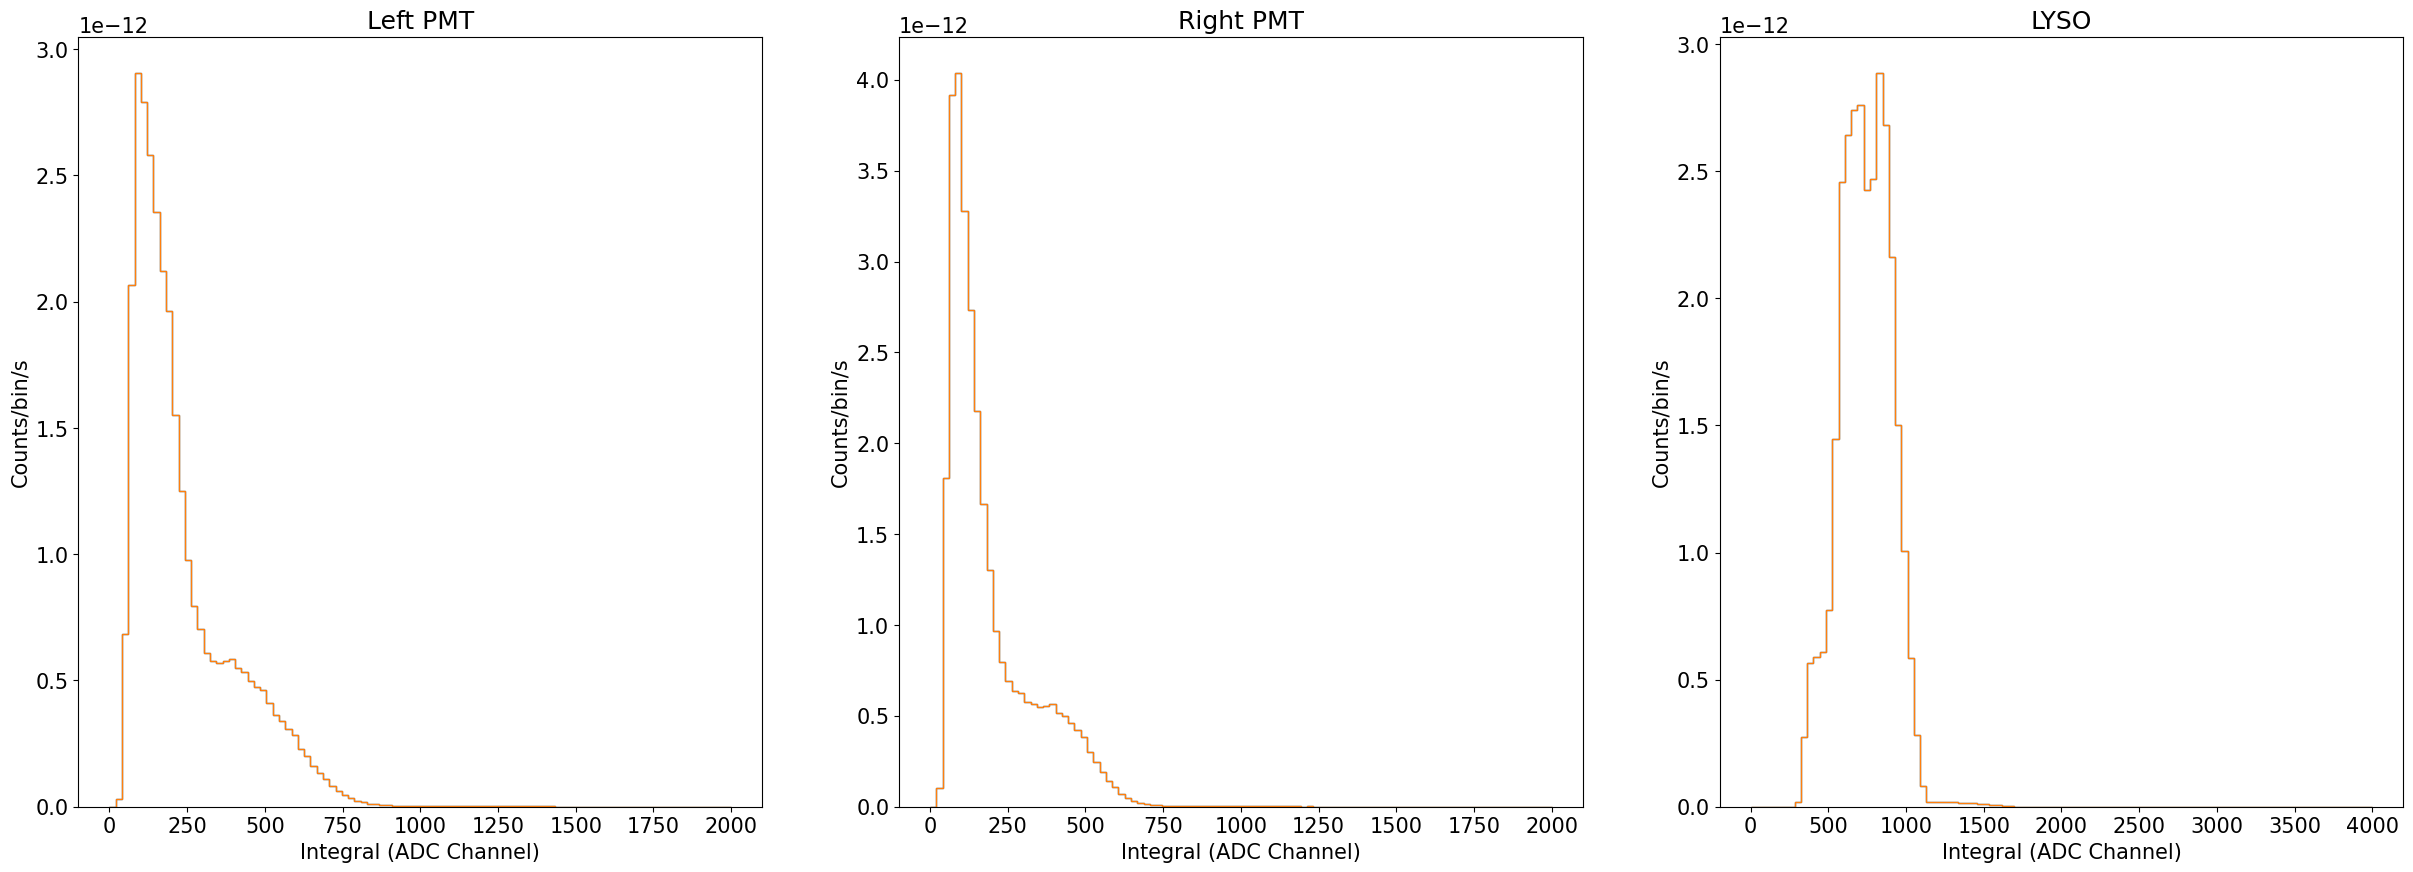

In [4]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file7Data
fileName = file7.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = dataFile, ChBins = [100,100,100], BinRange = [[0,2000],[0,2000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,2000],[0,2000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)

In [65]:


filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry/2025_02_03/'


file8 = 'SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_Vertical_scatter_v2.CSV'
bckfile = 'SDataR_Large_LSC_vessel_LYSO_bck_triple_coinc_Vertical_scatter_v2.CSV'

file8Data = ReadInFile(f'{filepath}/{file8}', 3)
file8bck = ReadInFile(f'{filepath}/{bckfile}', 3)


<class 'list'>
[array([107.,  69., 361., ..., 133., 137., 481.]), array([ 87.,  52., 469., ...,  75., 142., 402.]), array([592., 764., 510., ..., 365., 821., 551.])]


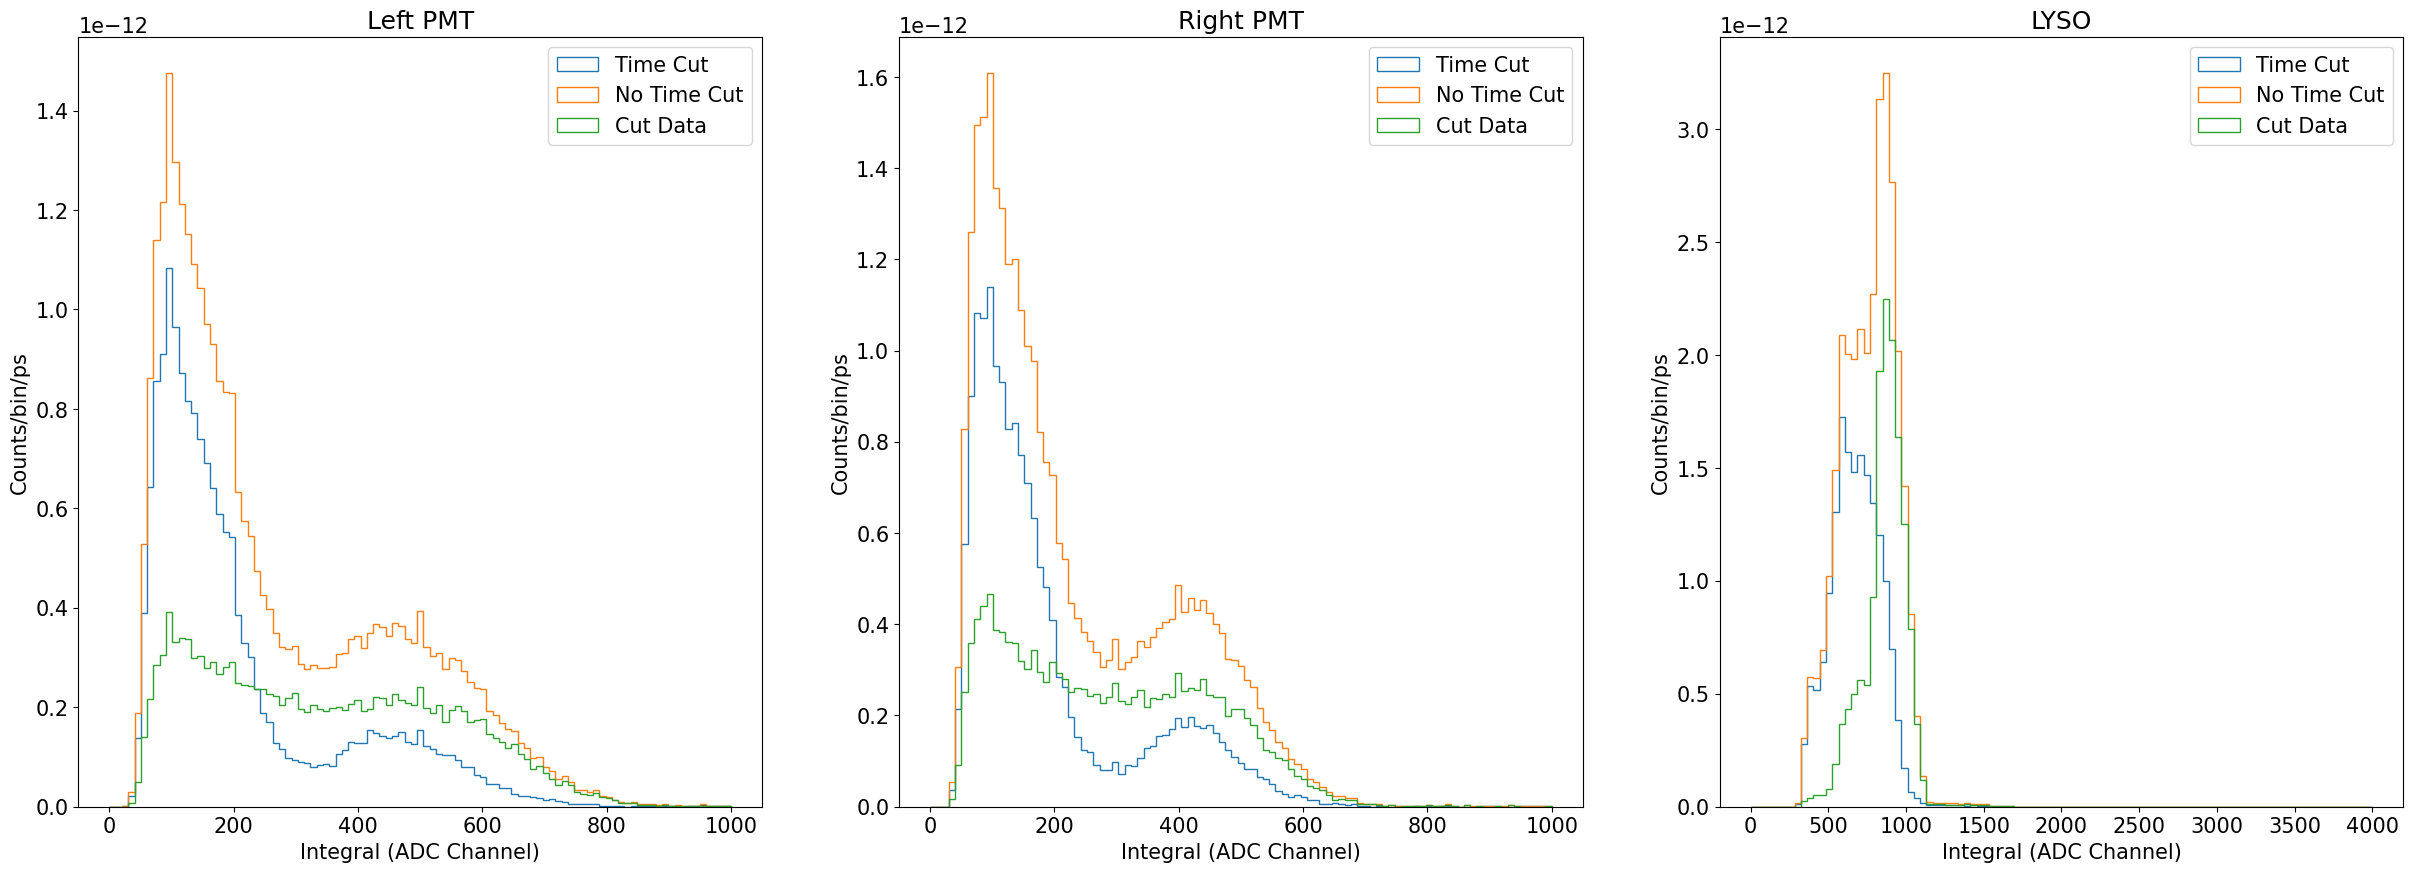

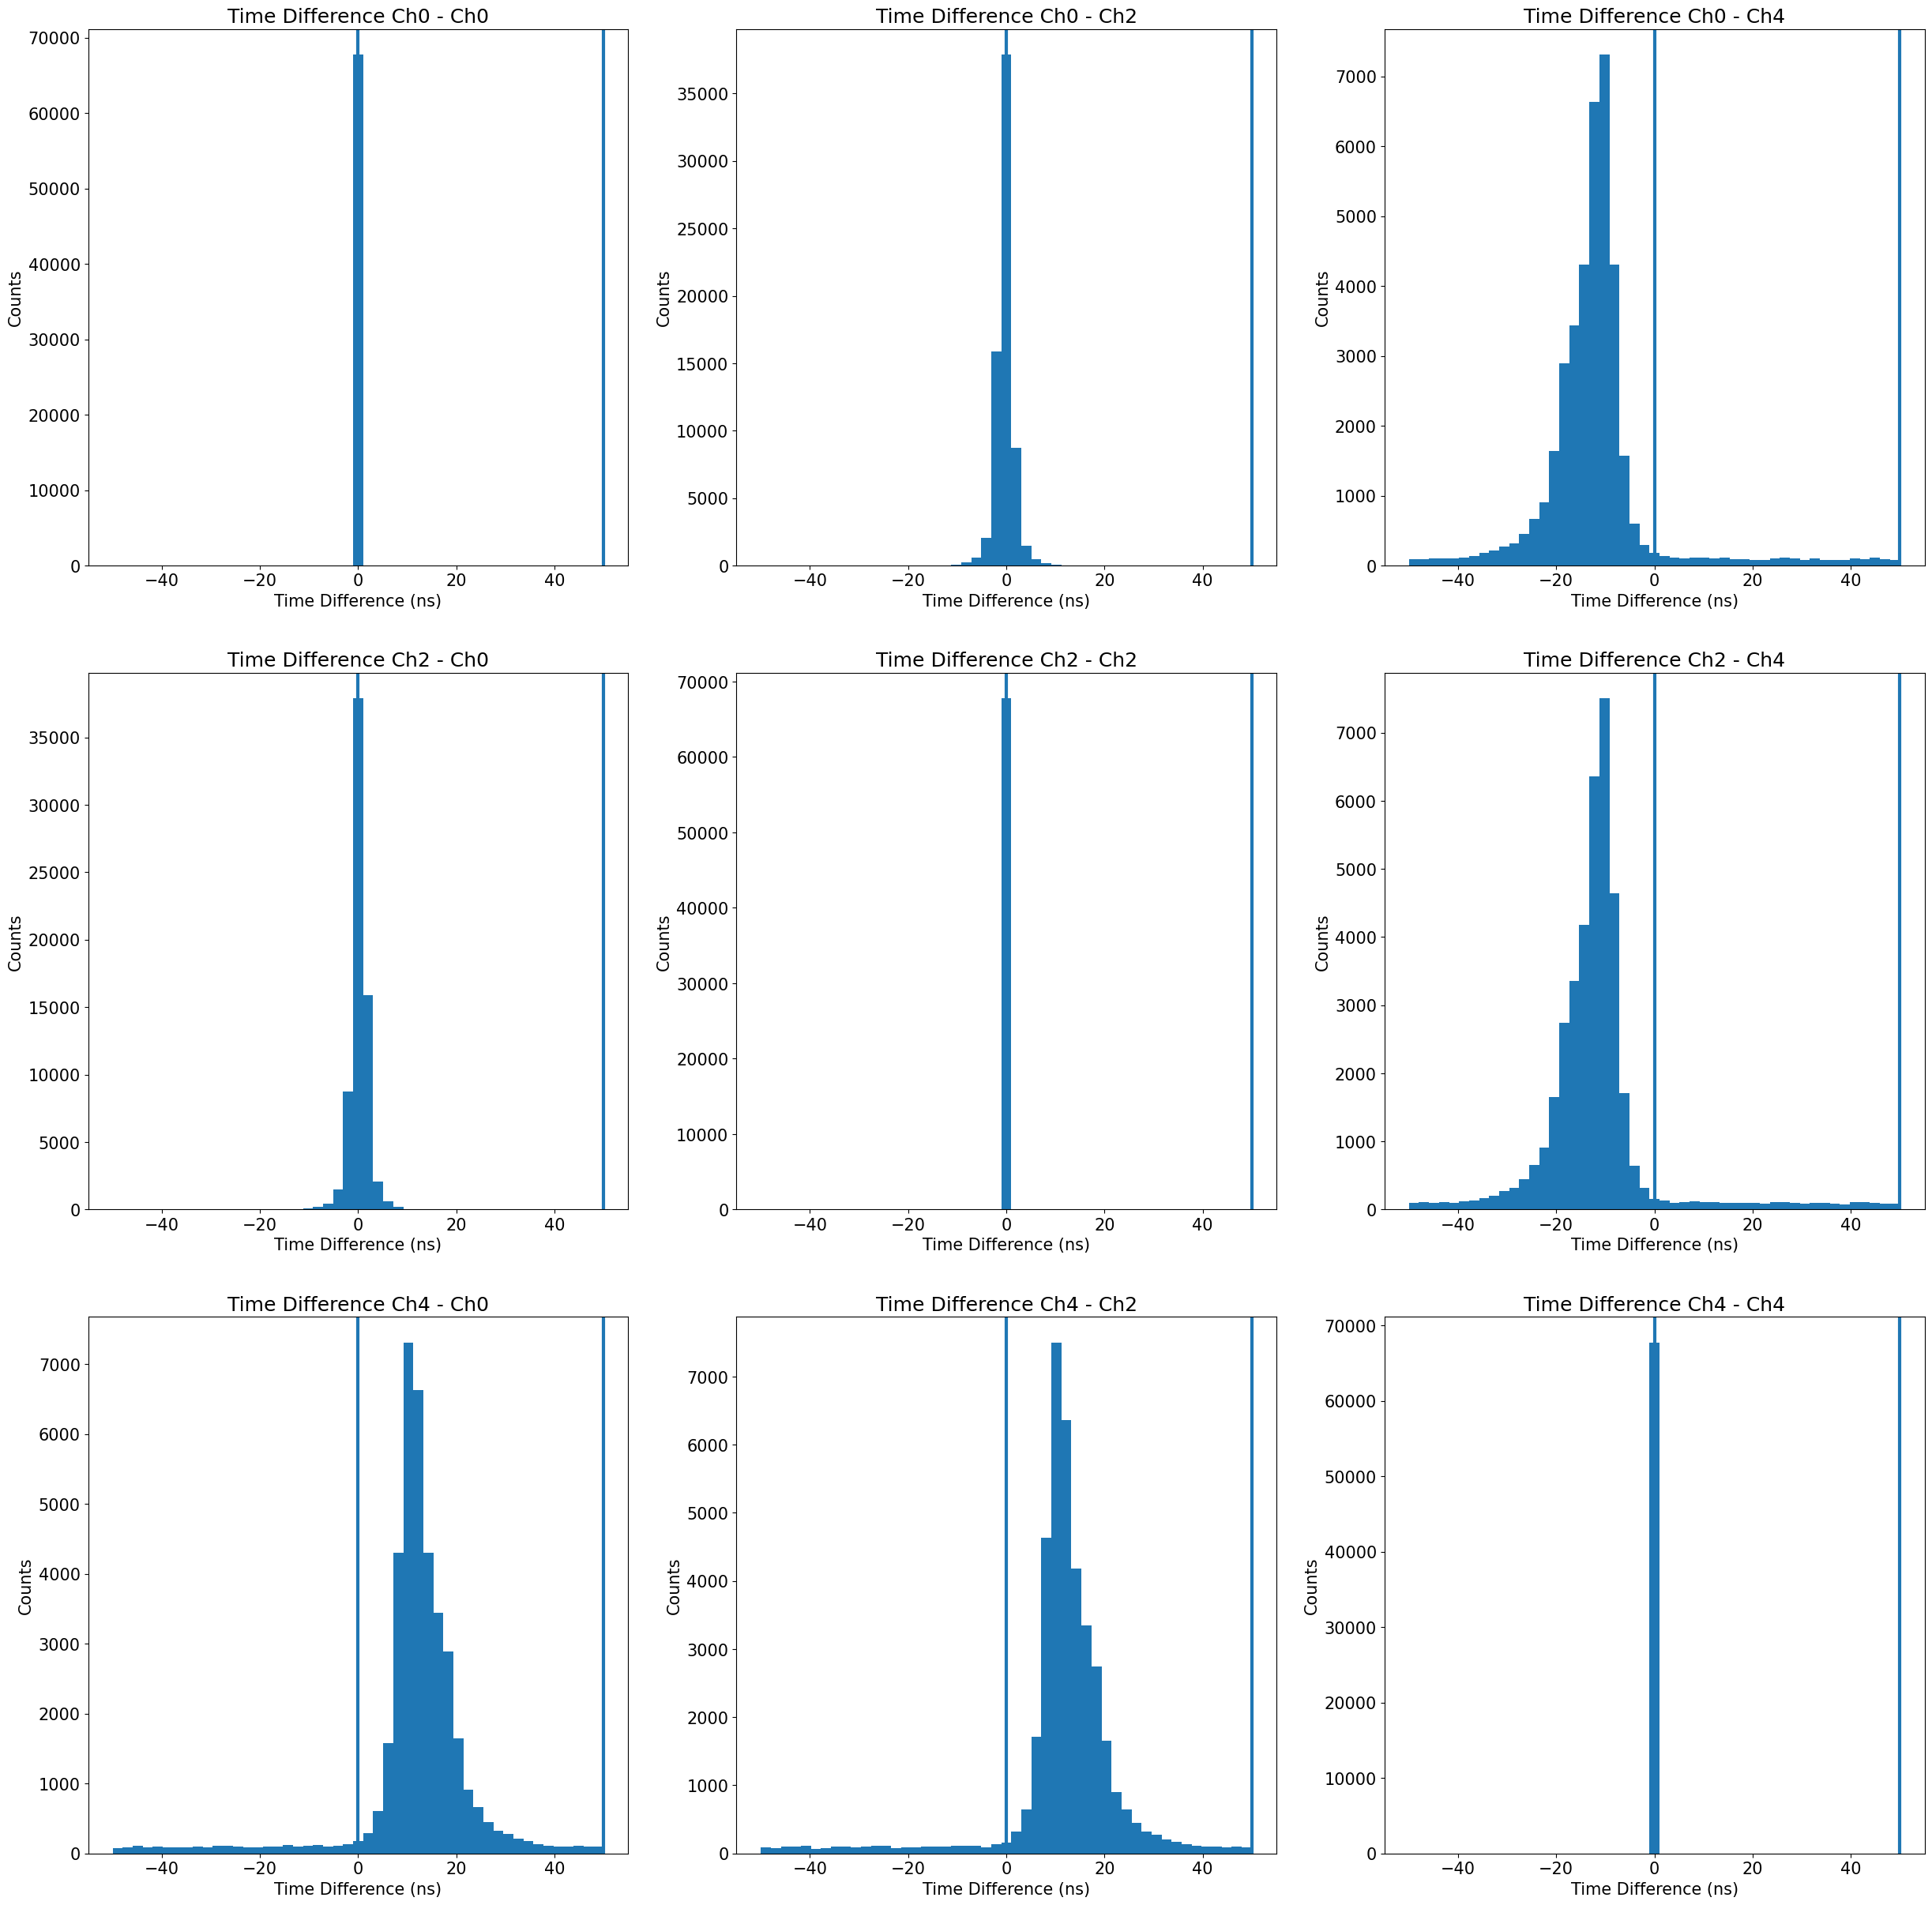

In [ ]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file8Data
fileName = file8.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = file8bck, ChBins = [100,100,100], BinRange = [[0,2000],[0,2000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,2000],[0,2000],[0,2000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,1000],[0,1000],[0,2000]],TimeBinRange= [-50000,50000],saveFilePath = saveFilePath,fileName = fileName)


# TimeCutHist(data=dataFile,ChBins = [100,100,100],ChBinRange = [[0,1000],[0,1000],[0,4000]],norm = False,TimeBinRange= [-50000,50000],timeCut = [0,50000],saveFilePath = saveFilePath,fileName= fileName)

# Vertical Geometry Testing - 10CG

- A new Lead geometry was tested to determine if that could make the Cs-137 line more resolvable. 
- 4 lead bricks were placed in a flat layer on the table with a small slit for the Cs-137. The LSC vessel was placed on top of the lead directly above the Cs-137. The LYSO was placed at a 90 degree angle with respect to the LSC. 
- LSC PMTs were set to have a coarse gain of 10 to see if this helps results at all. 

# First Test: SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_Vertical_scatter_v2_10CG

-

Settings for this trial 


| Setting                | Left PMT    | Right PMT   | LYSO        |
| --------               | -------     | -------     |-------      |
| **Pretrigger**         | 128ns       | 128ns       | 128ns       |
| **Polarity**           | Negative    | Negative    | Negative    |
| **N Samples Baseline** | 256 Samples | 256 Samples | 256 Samples |
| **Input Range**        | 0.5 vpp     | 0.5 vpp     | 2.0 vpp     |
| **Discriminator Mode** | LED         | LED         | LED         |
| **Threshold**          | 1000 lsb    | 1000lsb     | 1000lsb     |
| **Trigger HoldOff**    | 1024 ns     | 1024 ns     | 1024 ns     |
| **CFD Delay**          | N/A         | N/A         | 6ns         |
| **CFD Fraction**       | N/A         | N/A         | 75%         |
| **Smoothing**          | Disabled    | Disabled    | Disabled    |
| **Energy Coarse gain** | 10 fc       | 10fc        | 40fc        |
| **Gate**               | 300 ns      | 300 ns      | 400 ns      |
| **Pre-gate**           | 50 ns       | 50 ns       | 74 ns       |



In [15]:


filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry/2025_02_03/'


file9 = 'SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_Vertical_scatter_v2_10CG.CSV'
bckfile = 'SDataR_Large_LSC_vessel_LYSO_bck_triple_coinc_Vertical_scatter_v2_10CG.CSV'

file9Data = ReadInFile(f'{filepath}/{file9}', 3)
file9bck = ReadInFile(f'{filepath}/{bckfile}', 3)


In [16]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file9Data
fileName = file9.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = file9bck, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,4000],[0,4000],[0,4000]],TimeBinRange= [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)

In [20]:

filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry/2025_02_05/'


file10 = 'SDataR_Large_LSC_vessel_LYSO_Co60_triple_coinc_Vertical_scatter_v2.CSV'
bckfile = 'SDataR_Large_LSC_vessel_LYSO_bck_triple_coinc_Vertical_scatter_v2_2.CSV'

file10Data = ReadInFile(f'{filepath}/{file9}', 3)
file10bck = ReadInFile(f'{filepath}/{bckfile}', 3)


In [21]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file10Data
fileName = file10.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = file10bck, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,4000],[0,4000],[0,4000]],TimeBinRange= [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)

In [5]:

filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry/2025_02_05/'


file10 = 'SDataR_Large_LSC_vessel_NaI_Co60_triple_coinc_Vertical_scatter_v2.CSV'
bckfile = 'SDataR_Large_LSC_vessel_NaI_Co60_triple_coinc_Vertical_scatter_v2.CSV'

file10Data = ReadInFileNaI(f'{filepath}/{file10}', 3)
file10bck = ReadInFileNaI(f'{filepath}/{bckfile}', 3)


In [6]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file10Data
fileName = file10.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = file10bck, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,4000],[0,4000],[0,4000]],TimeBinRange= [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)

In [10]:
def TimeCut(data,timeCut):
    timeDiff = TimeDifferenceChannel(data,[2,0])
    
    CoincData = [[],[],[]]
    cutData = [[],[],[]]
    for i in range(len(data[0][0])):
        if timeDiff[i] > timeCut[0] and timeDiff[i] < timeCut[1]:
            CoincData[0].append(data[0][1][i])
            CoincData[1].append(data[1][1][i])
            CoincData[2].append(data[2][1][i])
        else:
            cutData[0].append(data[0][1][i])
            cutData[1].append(data[1][1][i])    
            cutData[2].append(data[2][1][i])    
            
    
    CoincData[0] = np.asfarray(CoincData[0],float)
    CoincData[1] = np.asfarray(CoincData[1],float)
    CoincData[2] = np.asfarray(CoincData[2],float)
    
    cutData[0] = np.asfarray(cutData[0],float)
    cutData[1] = np.asfarray(cutData[1],float)
    cutData[2] = np.asfarray(cutData[2],float)
    
    # CoincData = np.asfarray(CoincData,float)
    # cutData = np.asfarray(cutData,float)
    
    return CoincData, cutData
                
def energyHist1D(data, Bckdata, ChBins, BinRange, norm, log,saveFilePath,fileName):
    ######################################################################################################
    # Data: 2D array that contains the data of all the channels pre sorted using the RedInFile function. #
    # bckData: 2D array that contains the data of the background run.                                    #
    # ChBins: Array of the number of bins you want for each channel                                      #
    # BinRange: Range that the histogram will be binned over.                                            #
    ######################################################################################################
    # bins = 100
    # binRange = [0,1000]

    # binsLYSO = 100
    # binRangeLYSO = [0,2000]


    Int0, Bins0 = BinHistograms(data[0][1],BinRange[0],ChBins[0])
    Int2, Bins2 = BinHistograms(data[1][1],BinRange[1],ChBins[1])
    Int4, Bins4 = BinHistograms(data[2][1],BinRange[2],ChBins[2])

    bckInt0, bckBins0 = BinHistograms(Bckdata[0][1],BinRange[0],ChBins[0])
    bckInt2, bckBins2 = BinHistograms(Bckdata[1][1],BinRange[1],ChBins[1])
    bckInt4, bckBins4 = BinHistograms(Bckdata[2][1],BinRange[2],ChBins[2])
    
    normalize = norm
    logScale = log
    
    fig, ax = plt.subplots(1,3, figsize = (30,10))

    ax[0].hist(Bins0[:-1],bins =Bins0,density = normalize,weights=Int0/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Ch 0 (LSC)', log = logScale)
    ax[0].hist(bckBins0[:-1],bins =bckBins0,density = normalize,weights=bckInt0/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'Background Ch 0 (LSC)', log = logScale)

    ax[1].hist(Bins2[:-1],bins =Bins2,density = normalize,weights=Int2/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Ch 2 (LSC)', log = logScale)
    ax[1].hist(bckBins2[:-1],bins =bckBins2,density = normalize,weights=bckInt2/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'Background Ch 0 (LSC)', log = logScale)

    ax[2].hist(Bins4[:-1],bins =Bins4,density = normalize,weights=Int4/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Ch 4 (LYSO)', log = logScale)
    ax[2].hist(bckBins4[:-1],bins =bckBins4,density = normalize,weights=bckInt4/(Bckdata[0][0][-1] - Bckdata[0][0][0]),histtype = 'step',label = 'Background Ch 0 (LSC)', log = logScale)

    ax[0].set_title('Left PMT')
    ax[1].set_title('Right PMT')
    ax[2].set_title('LYSO')

    ax[0].set_xlabel('Integral (ADC Channel)')
    ax[1].set_xlabel('Integral (ADC Channel)')
    ax[2].set_xlabel('Integral (ADC Channel)')

    ax[0].set_ylabel('Counts/bin/ps')
    ax[1].set_ylabel('Counts/bin/ps')
    ax[2].set_ylabel('Counts/bin/ps')
    
    ax[0].legend(loc = 'best')
    ax[1].legend(loc = 'best')
    ax[2].legend(loc = 'best')
    
    
    # plt.show()
    plt.savefig(f'{saveFilePath}/{fileName}_integral_1D_hist.png')
    plt.close()
    
def TimeDiff1D(data, BinRange,saveFilePath,fileName):
    ######################################################################################################
    # Data: 2D array that contains the data of all the channels pre sorted using the RedInFile function. #
    # bckData: 2D array that contains the data of the background run.                                    #
    # timeBins: Array of the number of bins you want for each channel and time bin                       #
    # BinRange: Range that the histogram will be binned over.  
    ######################################################################################################   
    
    
    
    timeBins = (BinRange[1] - BinRange[0])//2000

    timebinsRange = np.linspace(BinRange[0],BinRange[1],timeBins)/1000


    fig,ax = plt.subplots(3,3,figsize = (30,30))
    
    for i in range(3):
        for j in range(3):

            ax[i,j].hist(TimeDifferenceChannel(data,[i,j])/1000, bins = timebinsRange)
            ax[i,j].set_title(f'Time Difference Ch{2*i} - Ch{2*j}')

            
    ax[0,0].set_xlabel('Time Difference (ns)')
    ax[0,1].set_xlabel('Time Difference (ns)')
    ax[0,2].set_xlabel('Time Difference (ns)')
    ax[1,0].set_xlabel('Time Difference (ns)')
    ax[1,1].set_xlabel('Time Difference (ns)')
    ax[1,2].set_xlabel('Time Difference (ns)')
    ax[2,0].set_xlabel('Time Difference (ns)')
    ax[2,1].set_xlabel('Time Difference (ns)')
    ax[2,2].set_xlabel('Time Difference (ns)')
    
    ax[0,0].set_ylabel('Counts')
    ax[0,1].set_ylabel('Counts')
    ax[0,2].set_ylabel('Counts')
    ax[1,0].set_ylabel('Counts')
    ax[1,1].set_ylabel('Counts')
    ax[1,2].set_ylabel('Counts')
    ax[2,0].set_ylabel('Counts')
    ax[2,1].set_ylabel('Counts')
    ax[2,2].set_ylabel('Counts')
    


    # plt.show()
    plt.savefig(f'{saveFilePath}/{fileName}_time_diff_1D_hist.png')
    plt.close()
    
    
def TimeCutHist(data,ChBins,ChBinRange,norm,TimeBinRange,timeCut,saveFilePath,fileName):
    
    CoincData, cutData = TimeCut(data,timeCut)
    print(type(CoincData))
    print(CoincData)
    
    fig,ax = plt.subplots(1,3, figsize = (30,10))
    
    # Int0, Bins0 = BinHistograms(data[0][1],BinRange[0],ChBins[0])
    # Int2, Bins2 = BinHistograms(data[1][1],BinRange[1],ChBins[1])
    # Int4, Bins4 = BinHistograms(data[2][1],BinRange[2],ChBins[2])

    # bckInt0, bckBins0 = BinHistograms(Bckdata[0][1],BinRange[0],ChBins[0])
    # bckInt2, bckBins2 = BinHistograms(Bckdata[1][1],BinRange[1],ChBins[1])
    # bckInt4, bckBins4 = BinHistograms(Bckdata[2][1],BinRange[2],ChBins[2])
    
    # ax[0].hist(Bins0[:-1],bins =Bins0,density = normalize,weights=Int0/(data[0][0][-1] - data[0][0][0]),histtype = 'step',label = 'Ch 0 (LSC)', log = logScale)
    
    for i in range(3):
        Int,Bins = BinHistograms(CoincData[i], ChBinRange[i],ChBins[i])
        ax[i].hist(Bins[:-1],bins = Bins,density = norm,weights = Int/(data[i][0][-1]-data[i][0][0]),histtype = 'step', label = 'Time Cut')
        
        IntRaw,BinsRaw = BinHistograms(data[i][1], ChBinRange[i],ChBins[i])
        ax[i].hist(BinsRaw[:-1],bins = BinsRaw,density = norm,weights = IntRaw/(data[i][0][-1]-data[i][0][0]),histtype = 'step', label = 'No Time Cut')
        
        IntNoCut,BinsNoCut = BinHistograms(cutData[i], ChBinRange[i],ChBins[i])
        ax[i].hist(BinsNoCut[:-1],bins = BinsNoCut,density = norm,weights = IntNoCut/(data[i][0][-1]-data[i][0][0]),histtype = 'step', label = 'Cut Data')
        
        ax[i].set_xlabel('Integral (ADC Channel)')
        ax[i].set_ylabel('Counts/bin/ps')
        ax[i].legend(loc = 'best')
    
    ax[0].set_title('Left PMT')
    ax[1].set_title('Right PMT')
    ax[2].set_title('LYSO')
    
    
    plt.savefig(f'{saveFilePath}/{fileName}_time_cut_hist.png')
    
    plt.show()

    timeBins = (TimeBinRange[1] - TimeBinRange[0])//2000
    timebinsRange = np.linspace(TimeBinRange[0],TimeBinRange[1],timeBins)/1000
    
    fig,ax = plt.subplots(3,3,figsize = (30,30))
    
    for i in range(3):
        for j in range(3):

            ax[i,j].hist(TimeDifferenceChannel(data,[i,j])/1000, bins = timebinsRange)
            ax[i,j].set_title(f'Time Difference Ch{2*i} - Ch{2*j}')
            
            ax[i,j].axvline(timeCut[0]/1000, color = 'red')
            ax[i,j].axvline(timeCut[1]/1000, color = 'red')
            
            
            ax[i,j].set_xlabel('Time Difference (ns)')
            ax[i,j].set_ylabel('Counts')
            
    plt.show()

In [62]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry_V3/2025_02_20/'


file10 = 'SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_Vertical_scatter_v3_small_collimation_10fc_LSC_2.CSV'
bckfile = 'SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_Vertical_scatter_v3_less_lead_10fc_LSC_2.CSV'

file10Data = ReadInFile(f'{filepath}/{file10}', 3)
file10bck = ReadInFile(f'{filepath}/{bckfile}', 3)

<class 'list'>
[array([ 965.,  788., 2998., ...,  834.,  540., 1883.]), array([ 898.,  712., 1804., ...,  438.,  292.,  938.]), array([759., 629., 332., ..., 437., 751., 662.])]


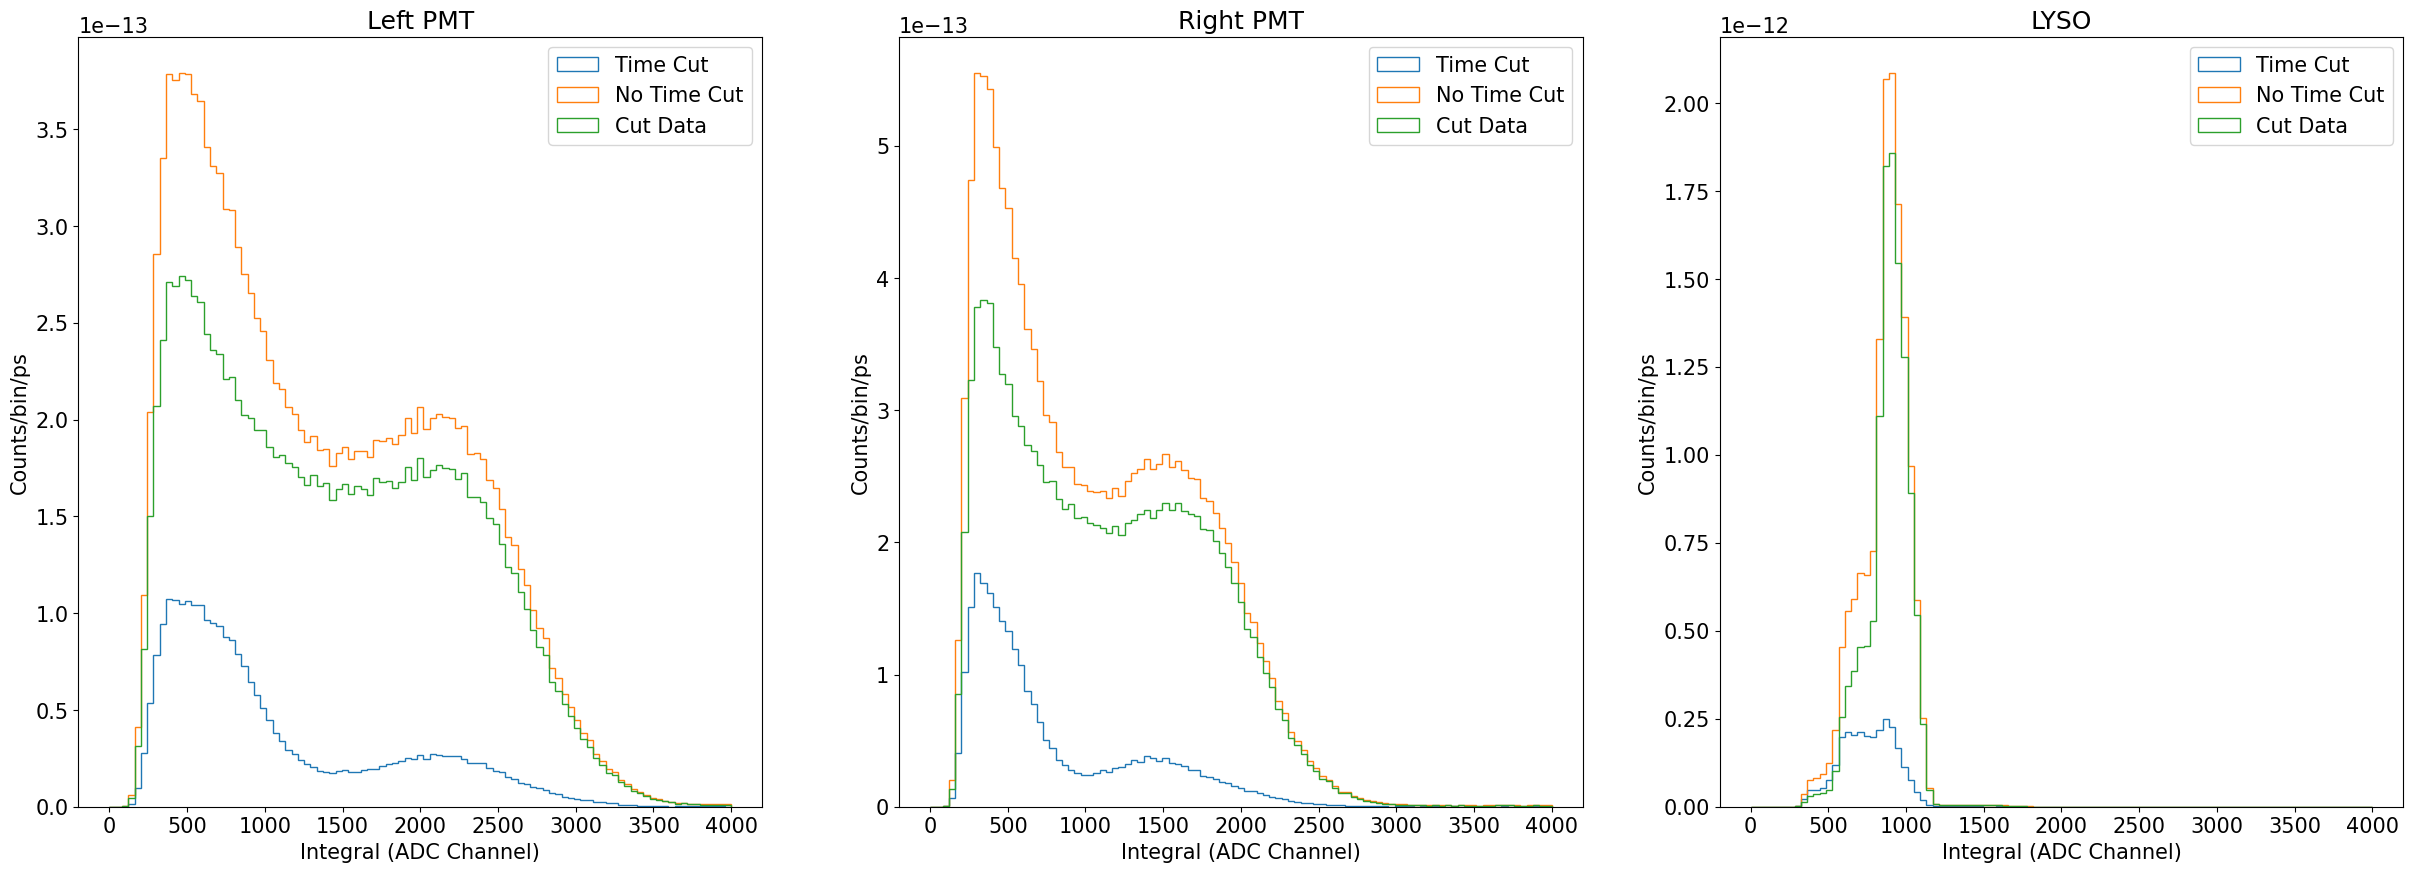

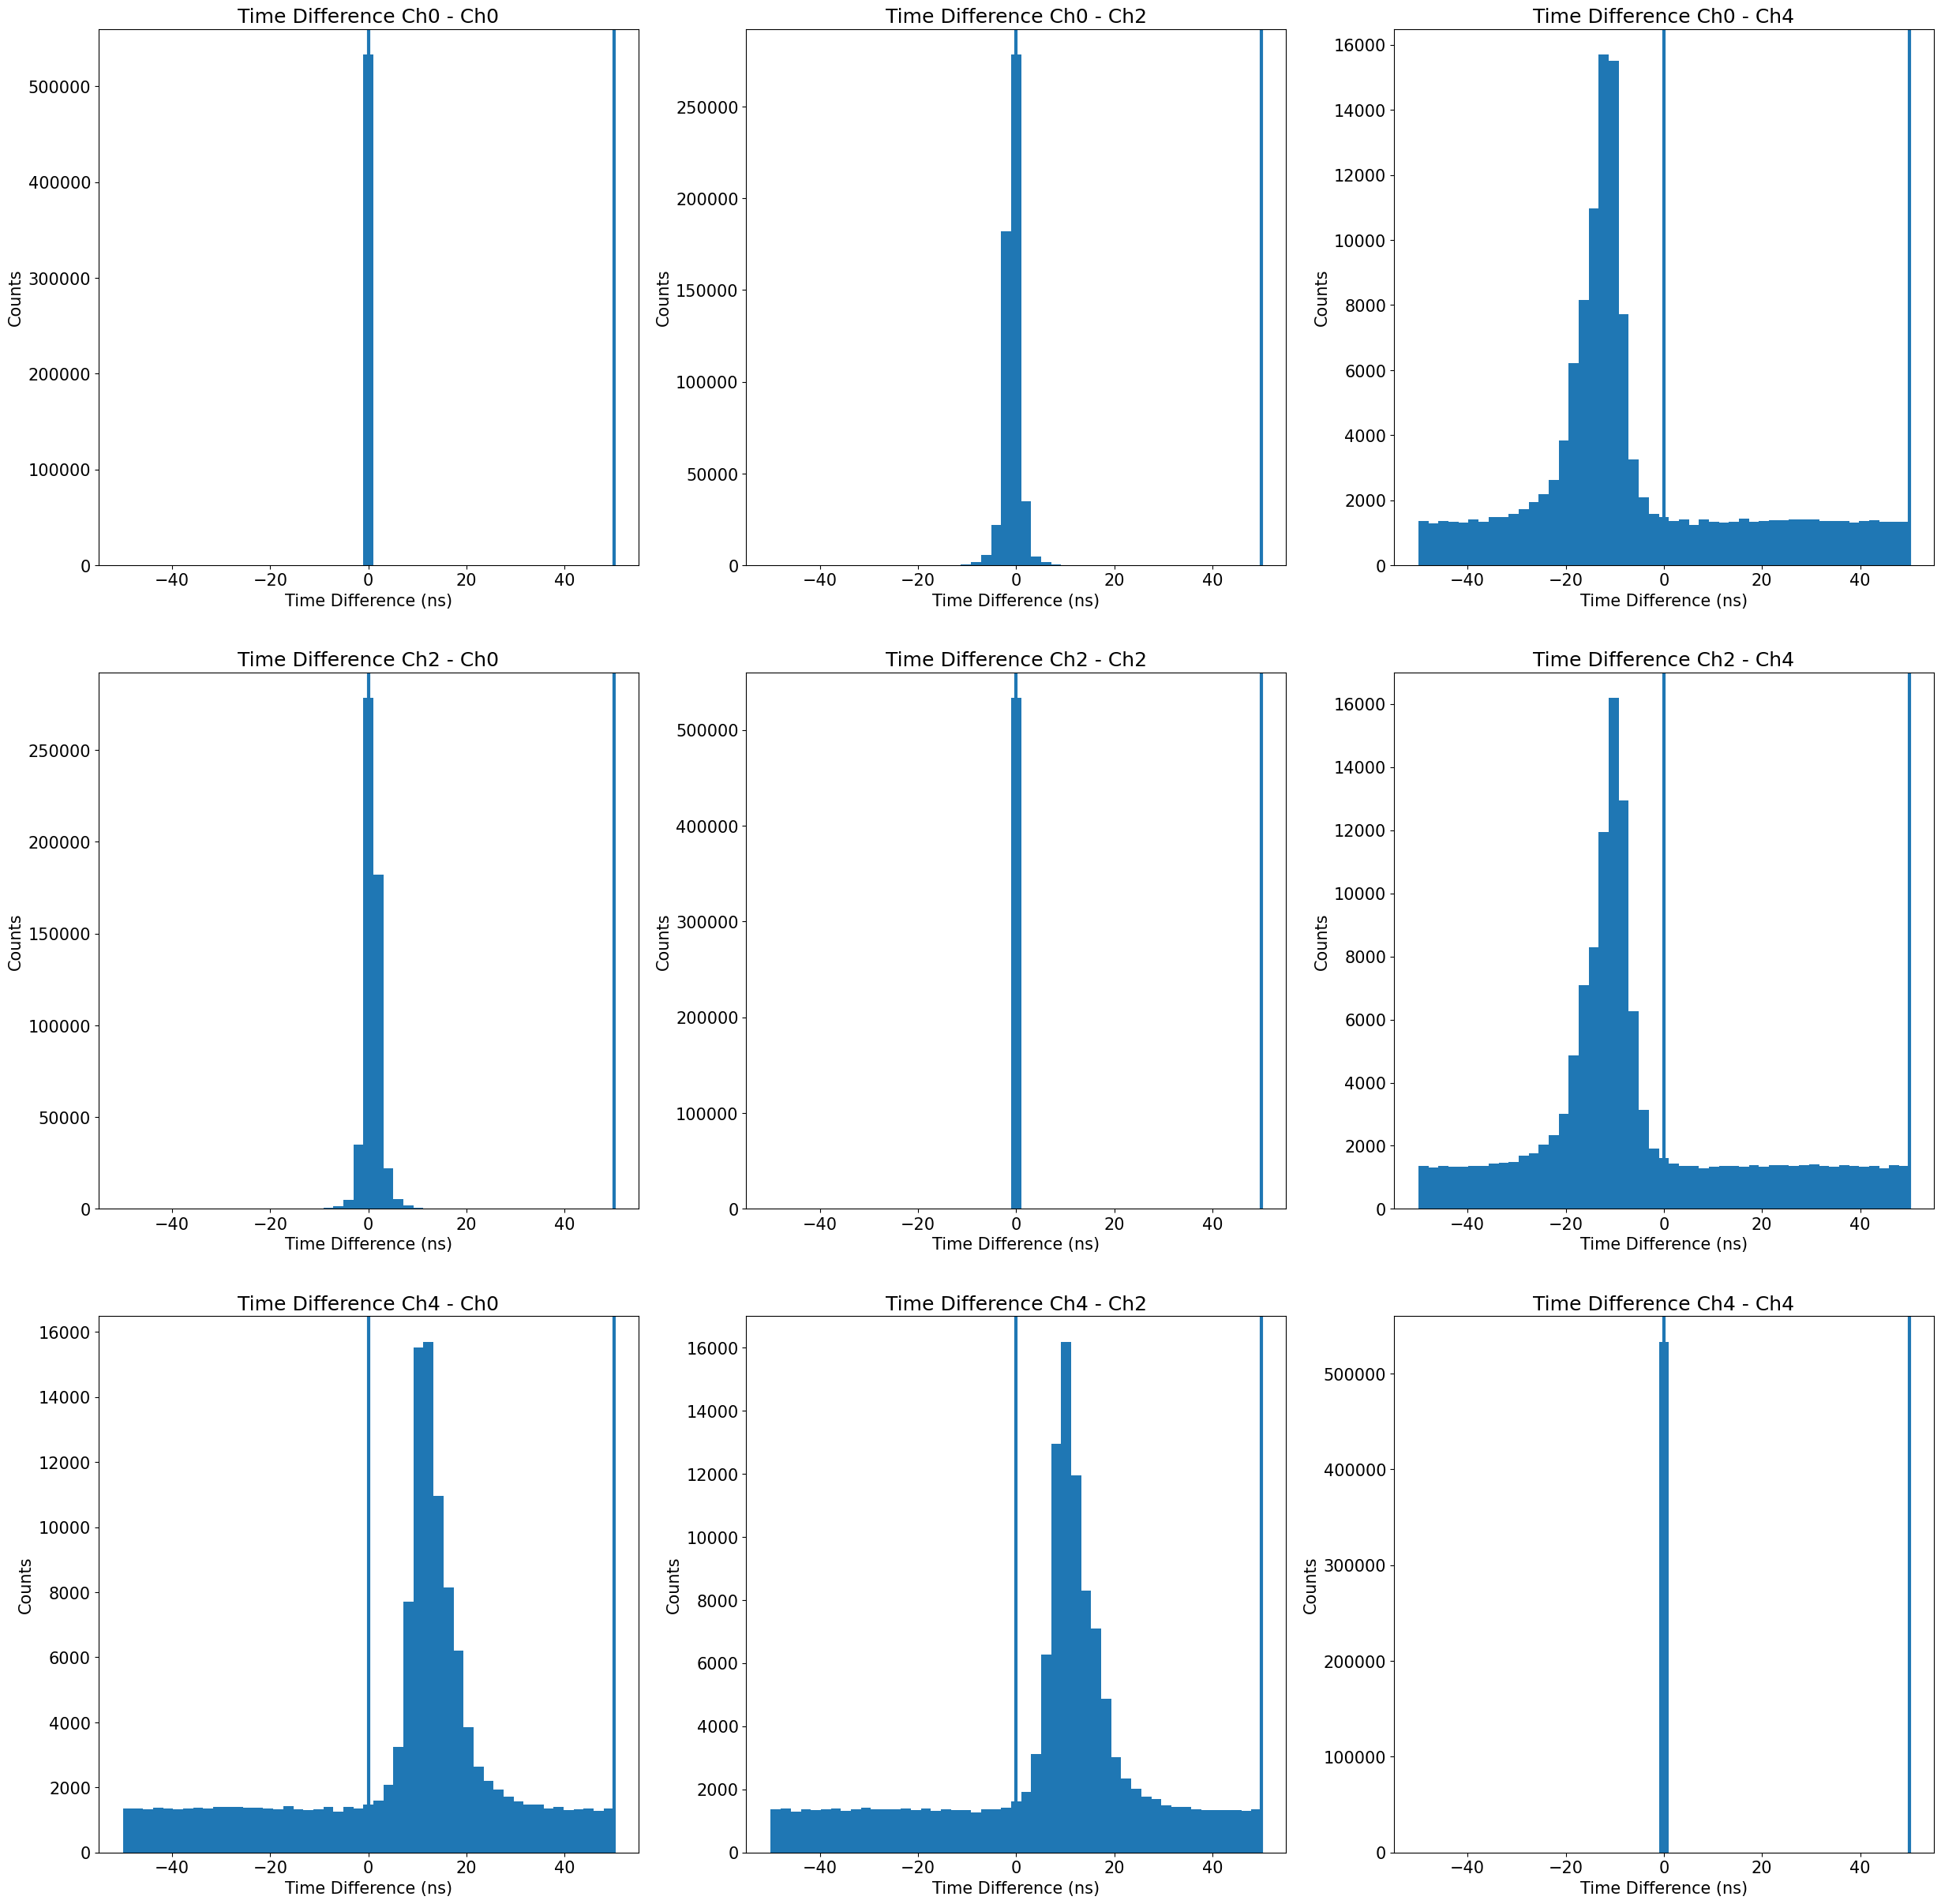

In [64]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file10Data
fileName = file10.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = file10bck, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,4000],[0,4000],[0,4000]],TimeBinRange= [-50000,50000],saveFilePath = saveFilePath,fileName = fileName)



TimeCutHist(data=dataFile,ChBins = [100,100,100],ChBinRange = [[0,4000],[0,4000],[0,4000]],norm = False,TimeBinRange= [-50000,50000],timeCut = [0,50000],saveFilePath = saveFilePath,fileName= fileName)

In [69]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry_v4/2025_02_21/'


file10 = 'SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_Vertical_scatter_v4_10fc_LSC.CSV'
bckfile = 'SDataR_Large_LSC_vessel_LYSO_Cs137_triple_coinc_Vertical_scatter_v4_10fc_LSC.CSV'

file10Data = ReadInFile(f'{filepath}/{file10}', 3)
file10bck = ReadInFile(f'{filepath}/{bckfile}', 3)

<class 'list'>
[array([ 757.,  555.,  419., ..., 1363.,  269.,  345.]), array([ 681.,  326.,  321., ..., 1409.,  156.,  386.]), array([743., 789., 570., ..., 988., 641., 628.])]


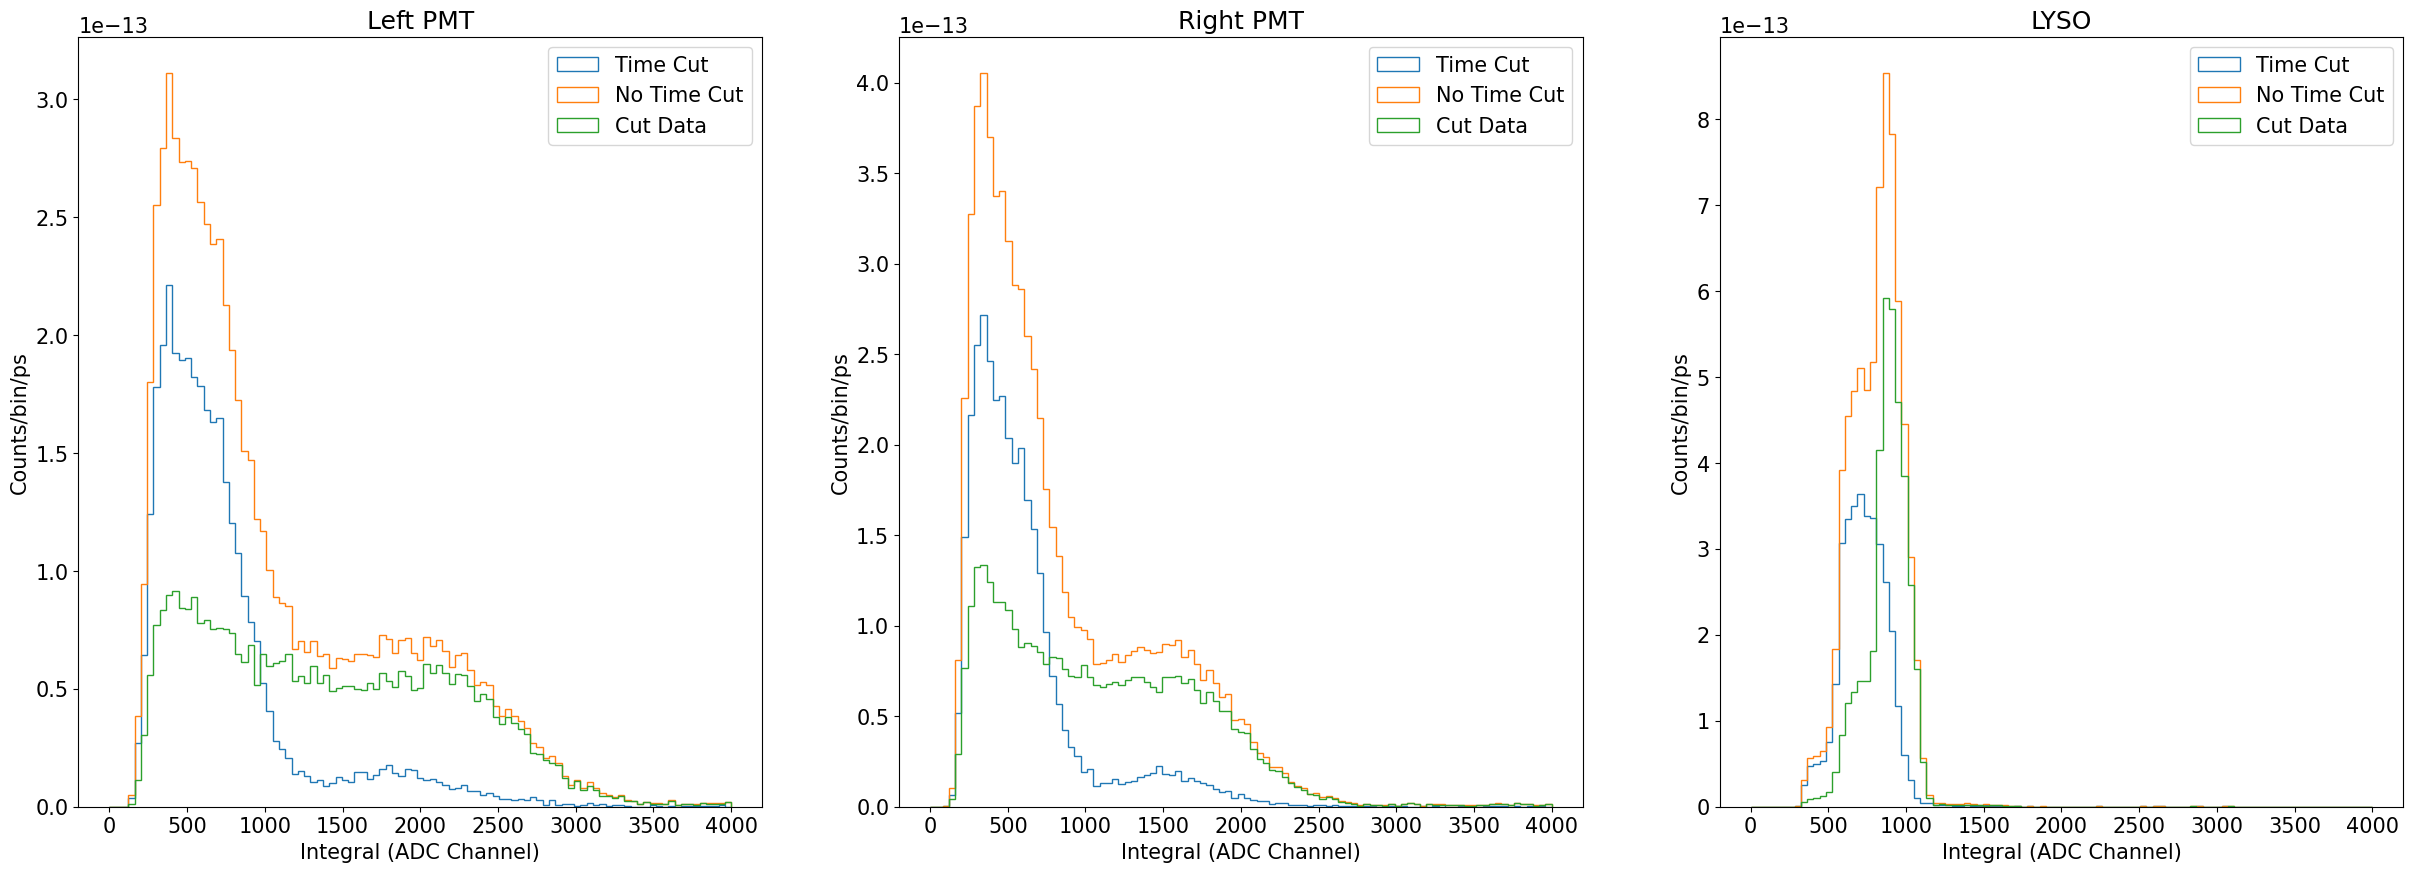

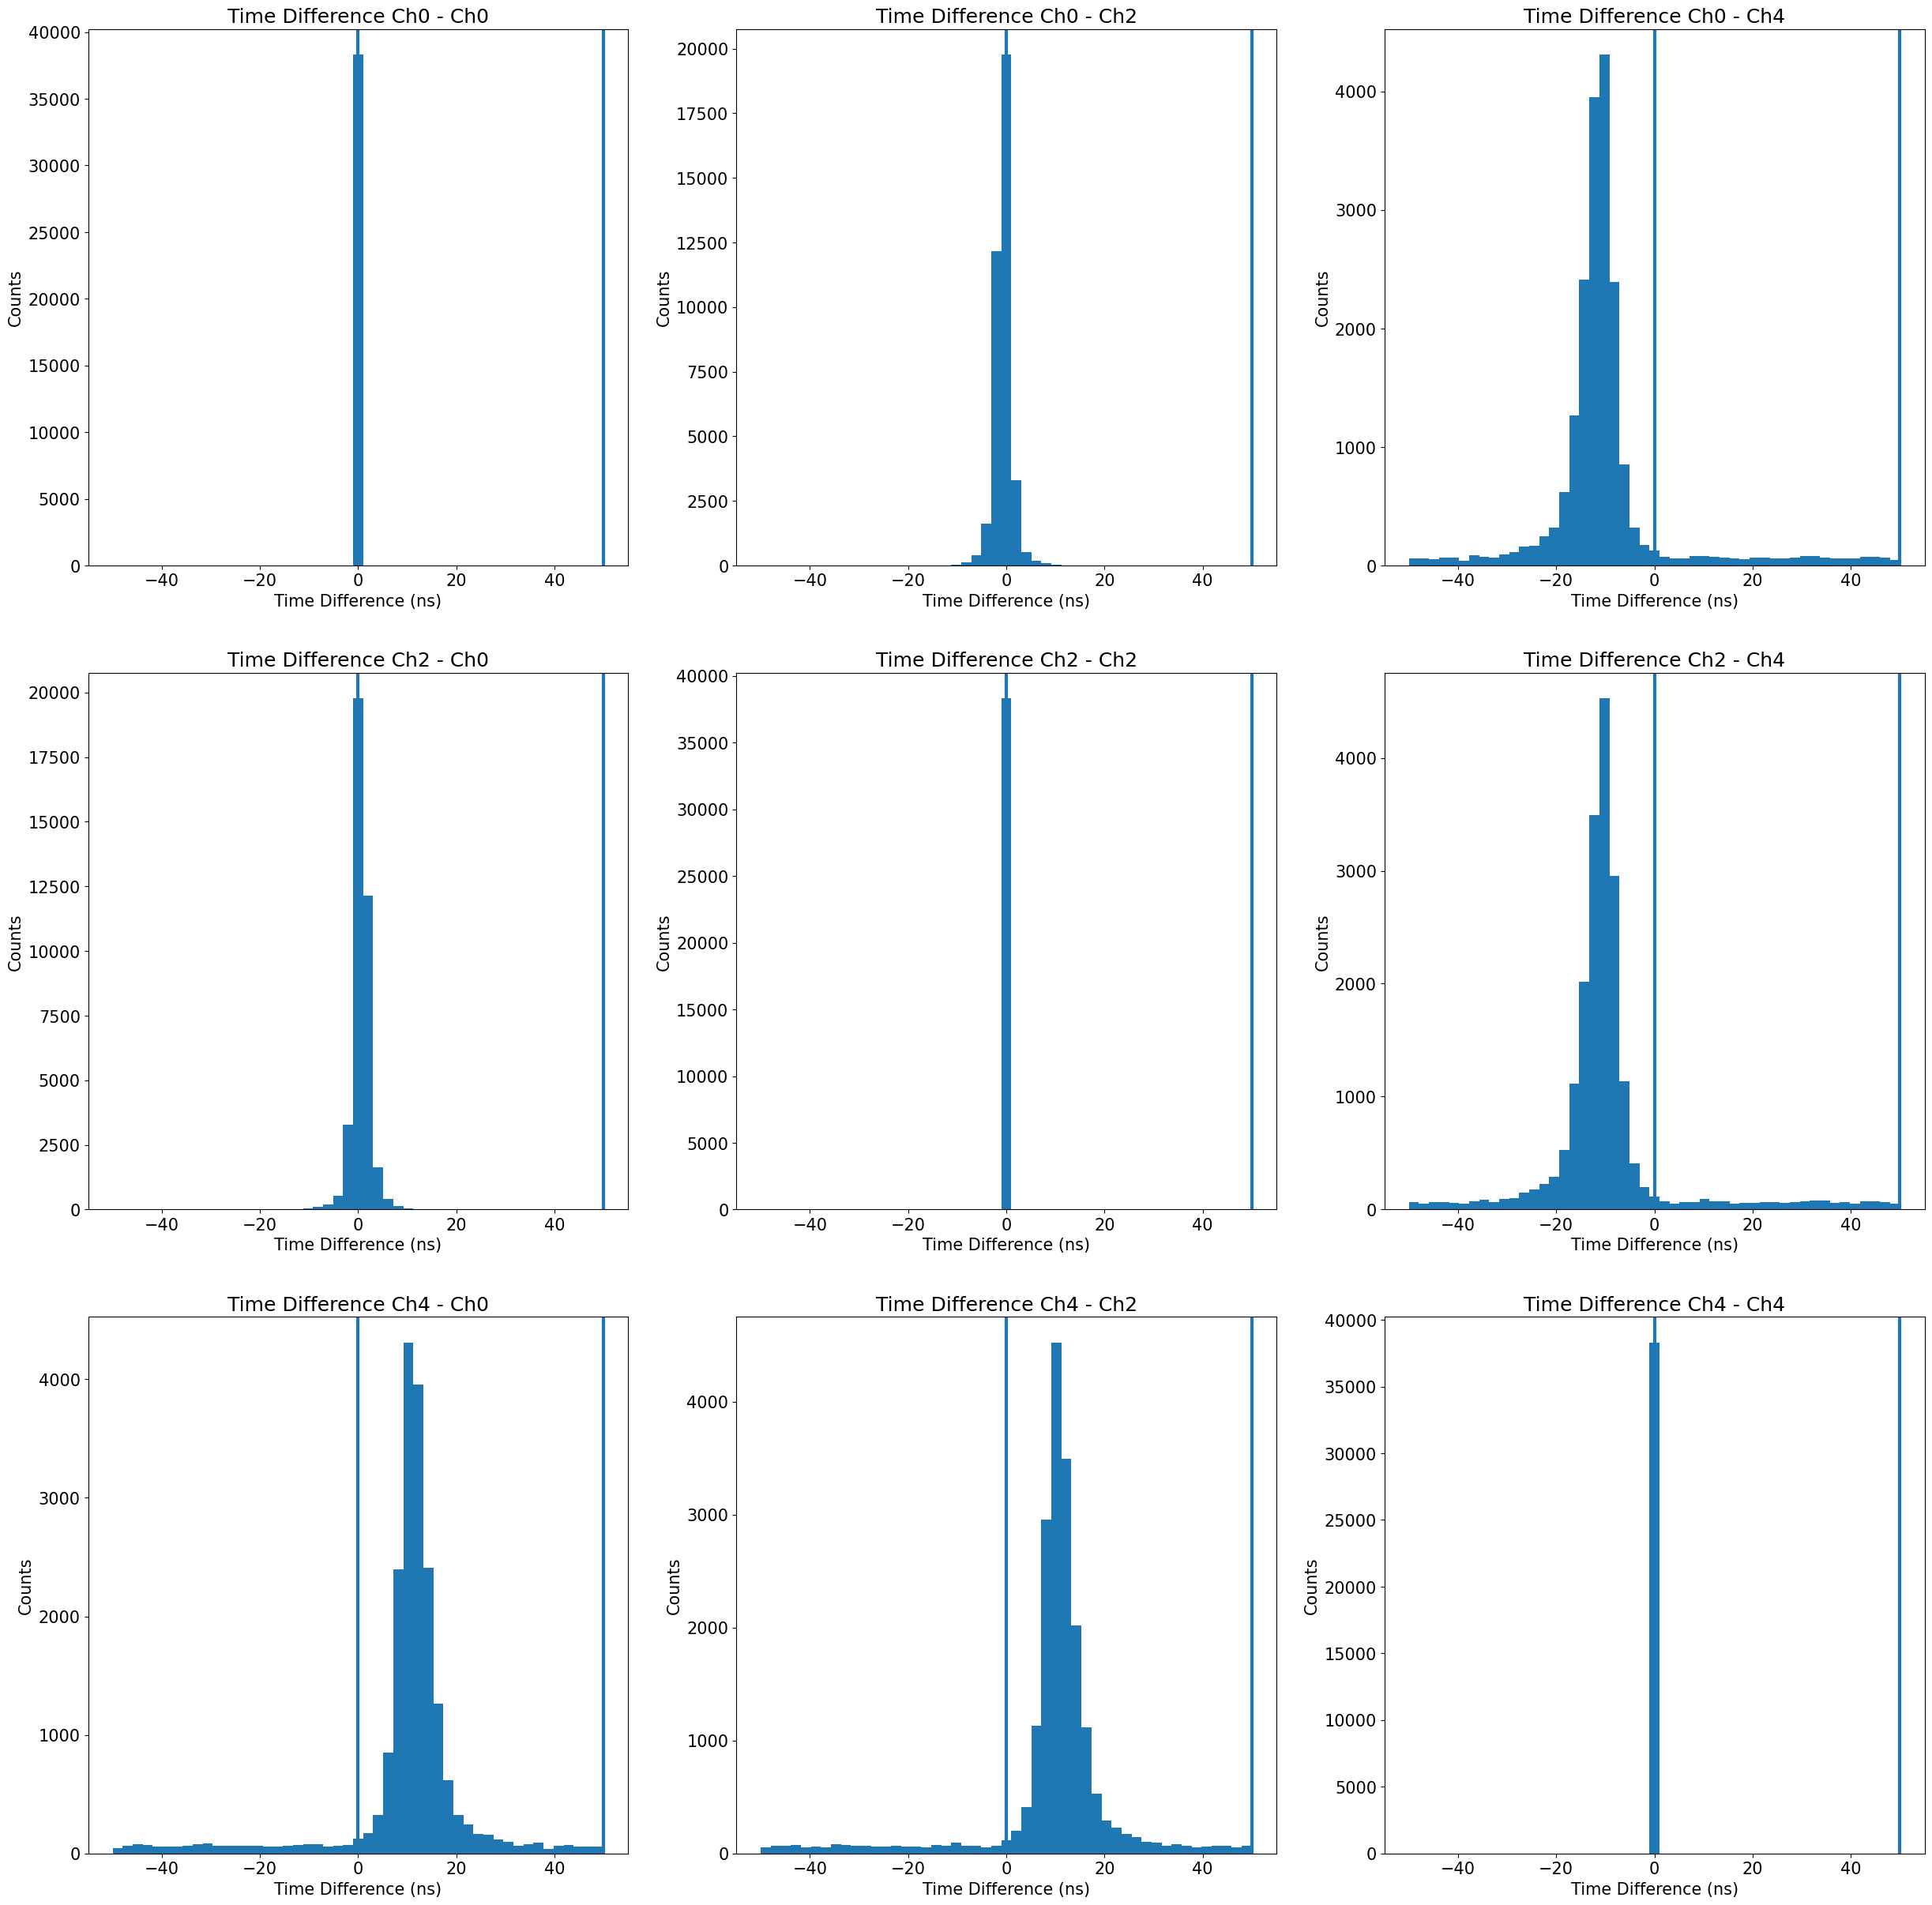

In [70]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file10Data
fileName = file10.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = file10bck, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,4000],[0,4000],[0,4000]],TimeBinRange= [-50000,50000],saveFilePath = saveFilePath,fileName = fileName)



TimeCutHist(data=dataFile,ChBins = [100,100,100],ChBinRange = [[0,4000],[0,4000],[0,4000]],norm = False,TimeBinRange= [-50000,50000],timeCut = [0,50000],saveFilePath = saveFilePath,fileName= fileName)

In [6]:
filepath = '/home/nick/PhD/KDK+/Large_LSC_testing/Vertical_scatter_geometry_v4/2025_02_21/'


file10 = 'SDataR_Large_LSC_vessel_NaI_Cs137_triple_coinc_Vertical_scatter_v4_10fc_LSC.CSV'
bckfile = 'SDataR_Large_LSC_vessel_NaI_Cs137_triple_coinc_Vertical_scatter_v4_10fc_LSC.CSV'

file10Data = ReadInFileNaI(f'{filepath}/{file10}', 3)
file10bck = ReadInFileNaI(f'{filepath}/{bckfile}', 3)

<class 'list'>
[array([2491., 1815., 1760., ..., 1552., 1570.,  454.]), array([1928., 1395., 1652., ..., 1294., 1523.,  319.]), array([185., 235., 132., ..., 130., 259., 260.])]


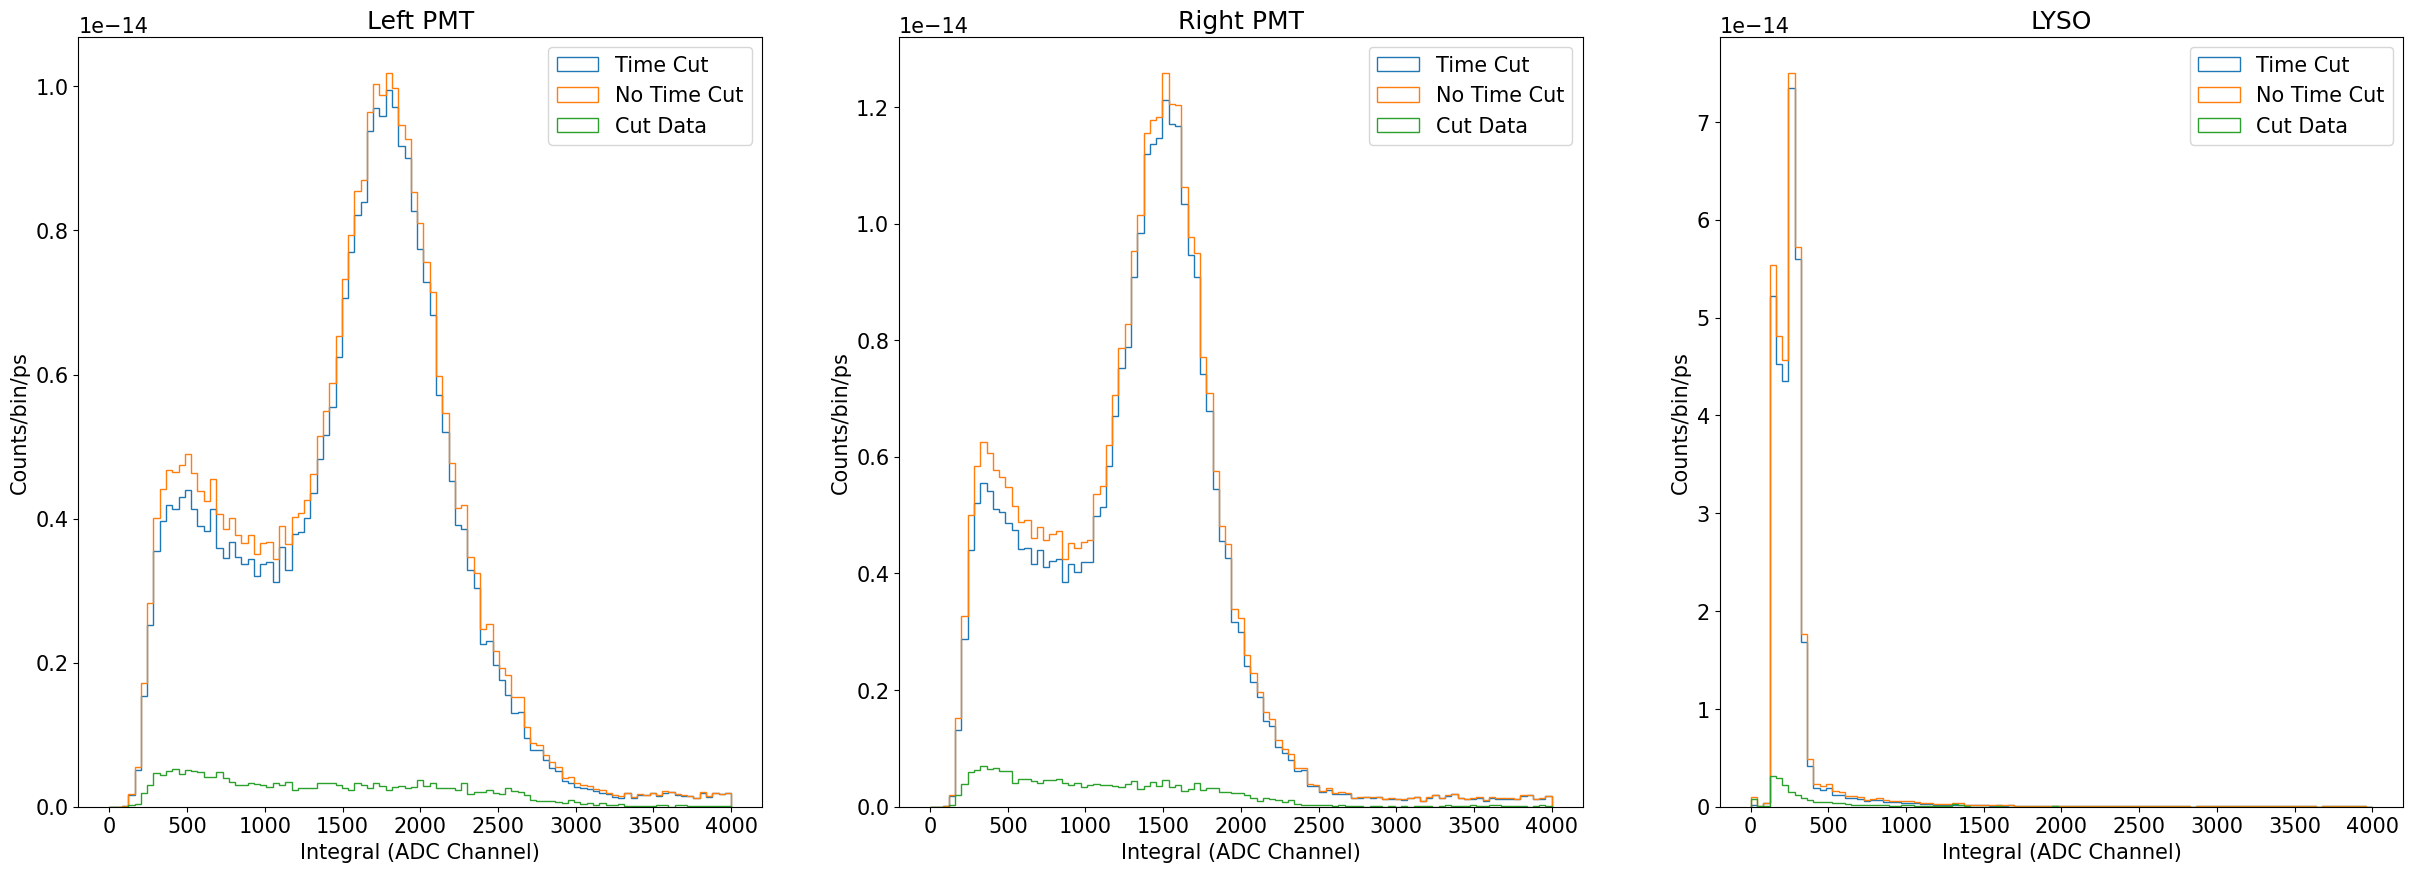

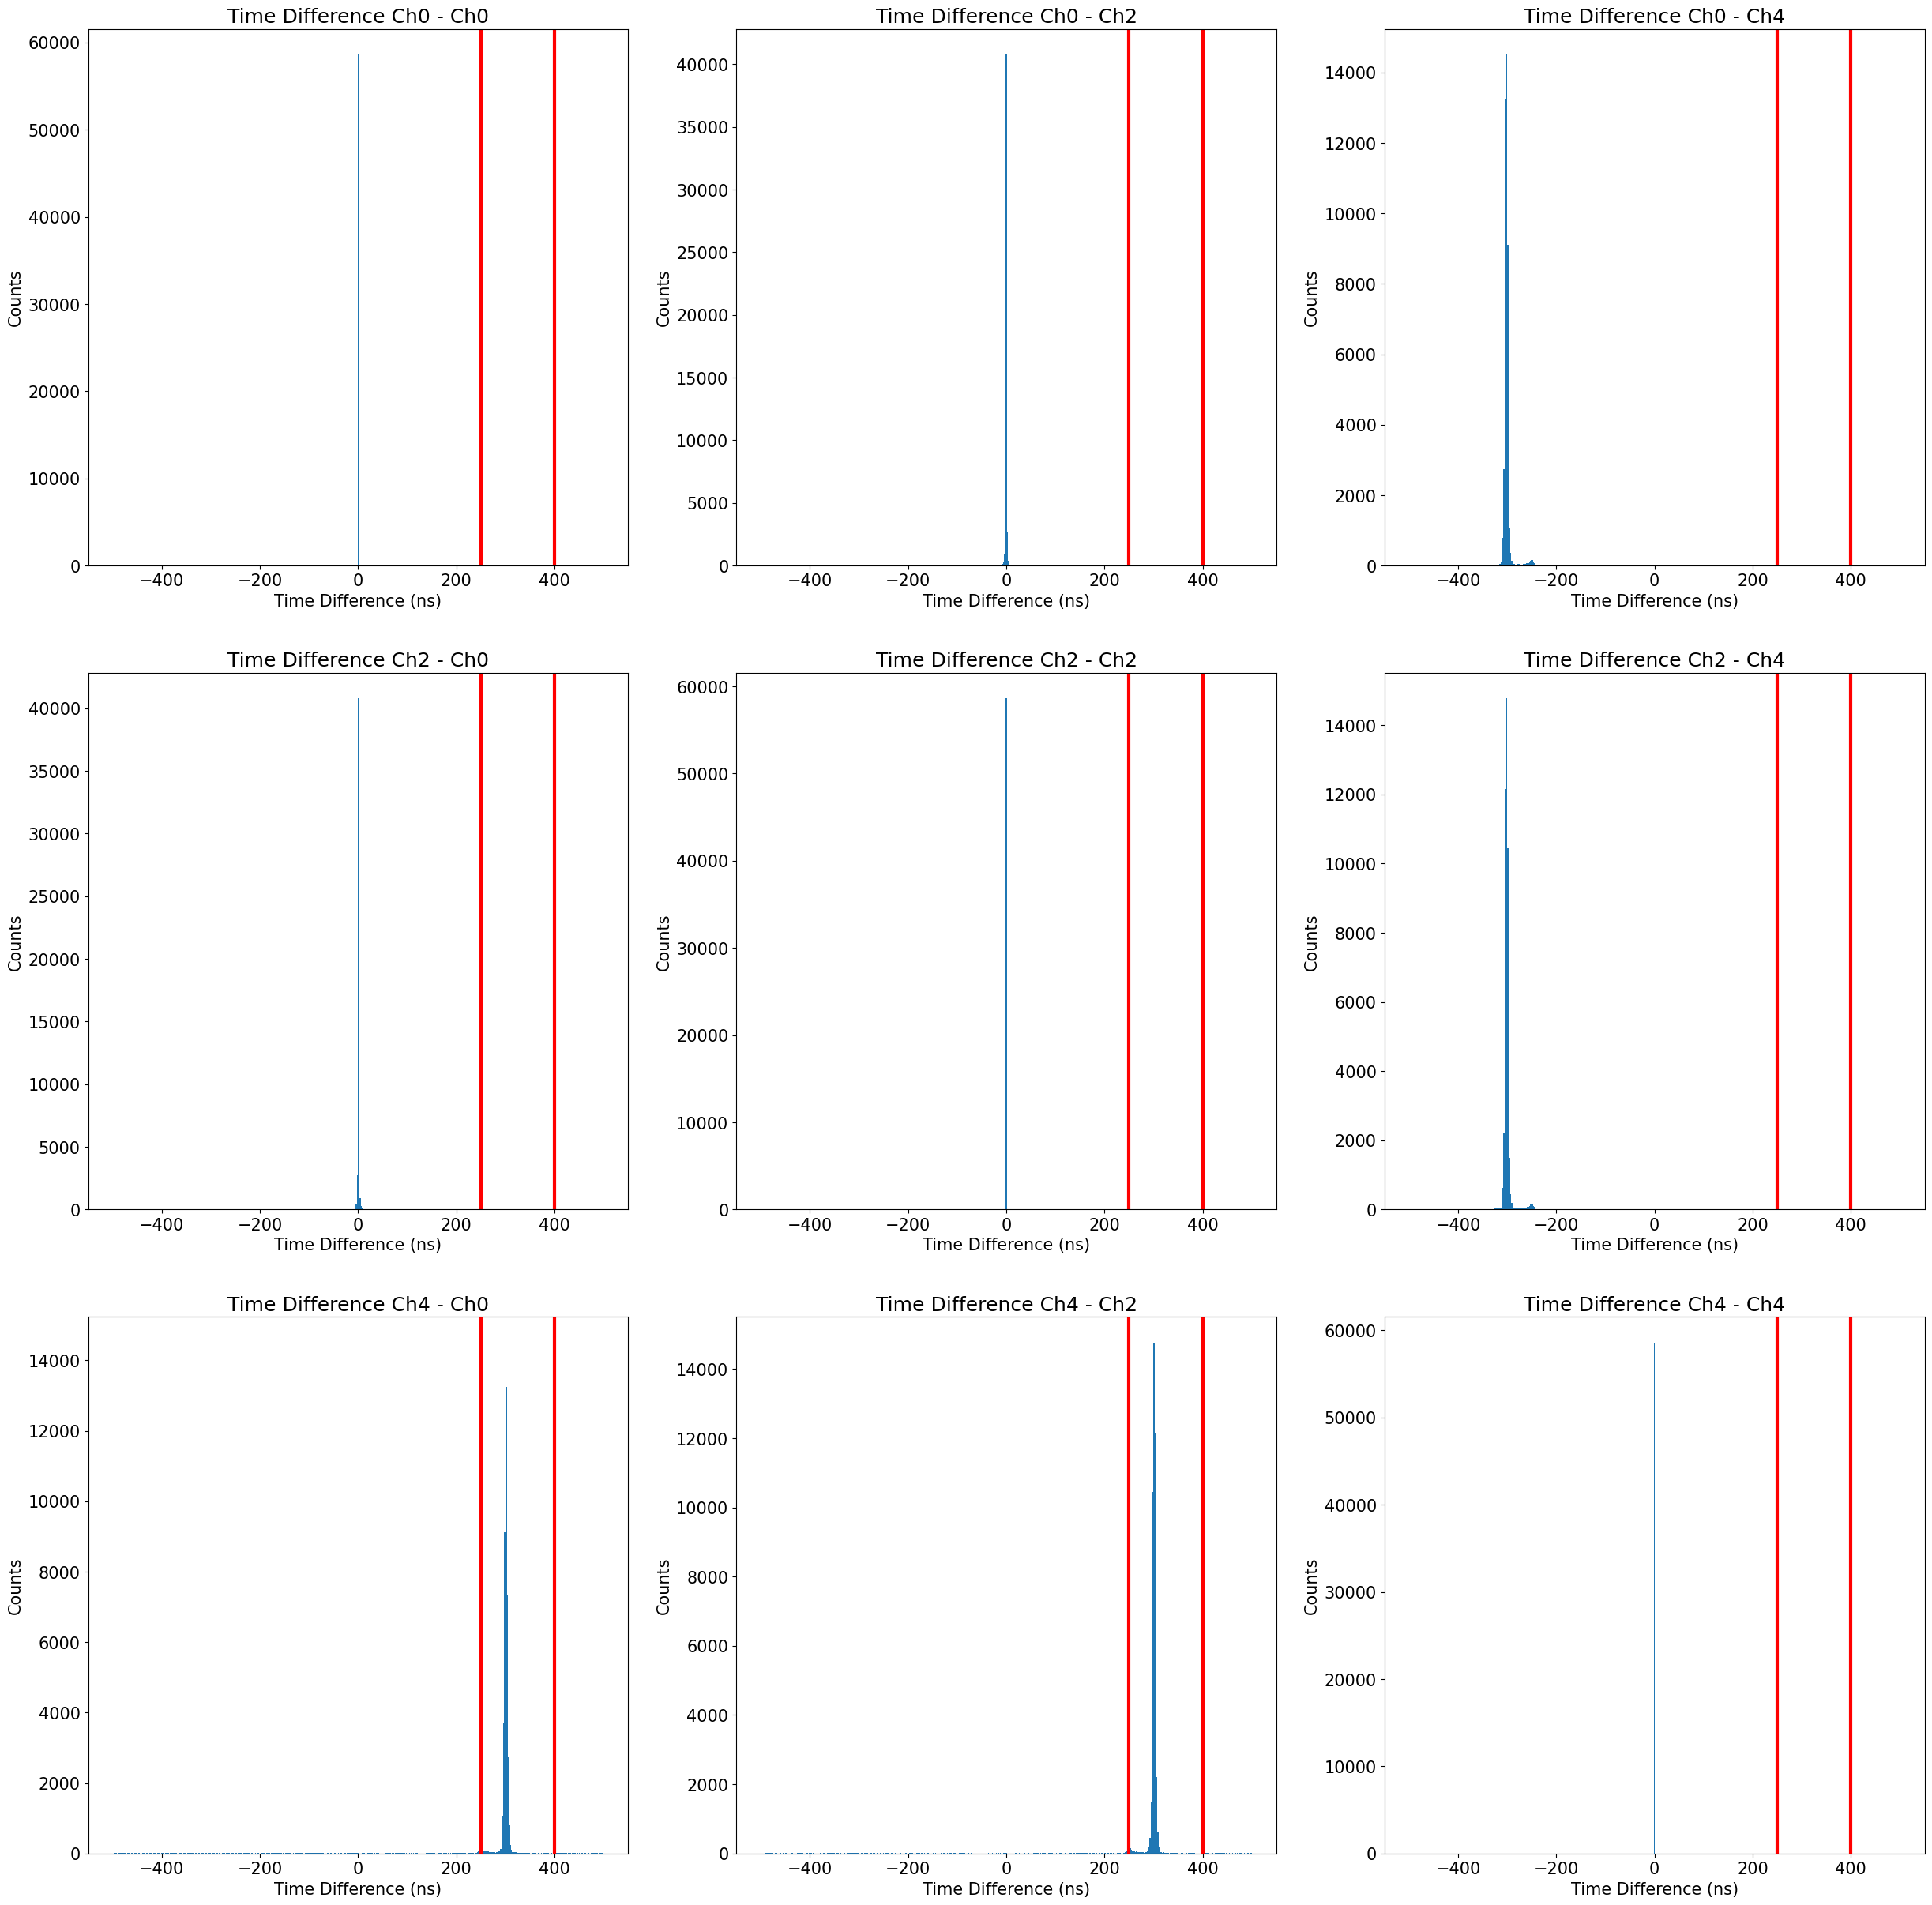

In [14]:
#################################################################################################
#   File 6 Plots
#################################################################################################




dataFile = file10Data
fileName = file10.split('.CSV')[0]
saveFilePath = f"{filepath}/{fileName}/figures"
Path(f"{saveFilePath}").mkdir(parents=True, exist_ok=True)


energyHist1D(data = dataFile, Bckdata = file10bck, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]], norm = False, log = False,saveFilePath = saveFilePath,fileName = fileName)
TimeDiff1D(data = dataFile, BinRange = [-500000,500000],saveFilePath = saveFilePath,fileName = fileName)
energyHist2D(dataFile, ChBins = [100,100,100], BinRange = [[0,4000],[0,4000],[0,4000]],saveFilePath = saveFilePath,fileName = fileName)
TimDiff2D(data = dataFile,ChBins = [100,100,100],ChBinRange= [[0,4000],[0,4000],[0,4000]],TimeBinRange= [-400000,-200000],saveFilePath = saveFilePath,fileName = fileName)



TimeCutHist(data=dataFile,ChBins = [100,100,100],ChBinRange = [[0,4000],[0,4000],[0,4000]],norm = False,TimeBinRange= [-500000,500000],timeCut = [250000,400000],saveFilePath = saveFilePath,fileName= fileName)